### 판다스 내장 그래프 도구
* 판다스는 Matplotlib 라이브러리의 기능을 일부 내장하고 있어서 별도로 임포드하지 않고 간단히 그래프 그릴 수 있음.
* 선그래프 : df.plot()메소드 적용시 다른 옵션을 추가하지 않으면 가장 기본적인 선 그래프를 그림.
* 막대 그래프 : df.plot(kind='bar'), df.plot(kind='barh',stacked=True,alpha=0.8)
* 히스토그램 : df.plot(kind='hist')
* 산점도 : df.plot(x=' ', y=' ', kind='scatter'), 상관관계를 볼 수 있음.
* 박스 플롯 : df.plot(kind='box'), df.boxplot(column=['feature']) 특정 변수의 데이터 분포와 분산 정도에 대한 정보를 제공.

## matplotlib
- histogram : plt.hist(x, bins= )
- line plot : plt.plot(x,y)
- plt.bar(x,y, width= , color='')
- scatter plot : plt.scatter(x, y): 

## seaborn
- sns.distplot(data, bins=, color=, kde=), histplot, displot으로 변경
- sns.boxplot(x, y, data, color)
- sns.violinplot(x, y, data, color)
- sns.barplot(x, y, data, color)
- sns.jointplot(x, y, data, color)
- sns.pairplot(data, hue, palette)
- sns.lmplot(x,y,data,color)
- sns.regplot(x,y,data,fig_reg=False)

### 그래프 그리기

1. pandas
- 선그래프 : df.plot()
- 막대 그래프 : df.plot(kind='bar',figsize=(10,5)), df.plot(kind='barh',stacked=True,alpha=0.8)
- 수평 막대 그래프 : df.plot(kind='barh',color='skyblue'), df.plot.barh( )
- 히스토그램 : df.plot(kind='hist')
- 산점도 : df.plot(x=' ', y=' ', kind='scatter',figsize=(10,5))
- 박스 플롯 : df.plot(kind='box'), df.boxplot(column=['feature'])



2. matplotlib - 스타일 : plt.style('ggplot') 
- 히스토그램 : plt.hist(x, bins= , label= ) 
- 선그래프 : plt.plot(x,y) 
- 수직 막대그래프 : plt.bar(x,y, width= , color='') 
- 수평 막대 그래프: plt.barh(y,x), plt.yticks(y,years) 
- 산점도 : plt.scatter(x,y) 
- 파이 차트 : plt.pie(ratio, labels=labels, autopct='%.1f%%') 
- 박스 플롯 : plt.boxplot([data_a,data_b]) 
- 바이올린 플럿 : plt.violinplot([data],showmeans=True)

3. seaborn
- 두 변수 간의 관계를 시각화하는 그래프 : 
  sns.relplot(data=df,x=,y=,hue='')

- 산점도 그래프 : scatterplot(data=df,x='',y='') 
- 선 그래프 : sns.lineplot(data=df,x='',y='',hue='',err_style='band')
- 산점도+회귀선 그래프 : lmplot(data=df,x='',y='')
- 산점도+회귀선 그래프 : regplot(data=df,x='',y='')
- 히스토그램 그래프 : sns.histplot(data=df,x='',kde=True)
- 밀도 그래프 : sns.kdeplot(data=df,x='') 
- 박스 그래프 : sns.boxplot(data=df,x='') 
- 바이올린 그래프 : sns.violinplot(data=df,x='') 
- 막대 그래프 : sns.barplot(data=df,x='',y='') 
- 빈도수 그래프 : sns.countplot(x='',data=) 
- 멀티 그래프 : sns.jointplot(data=df,x='',y='',kind='reg') 
- 히트맵 그래프 : sns.heatmap(df.[['columns']].corr(), annot=True)
- 다변량 그래프 : sns.pairplot(df)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../dataset/주가데이터.csv')
df.drop('시가',axis=1,inplace=True)   #'시가'열 삭제
df.columns=['date','close','start','high','low','volume']   #칼럼명 변경

df.head()

,date,close,start,high,low,volume
0,2018-07-02,10100,600,10900,10000,137977
1,2018-06-29,10700,300,10900,9990,170253
2,2018-06-28,10400,500,10950,10150,155769
3,2018-06-27,10900,100,11050,10500,133548
4,2018-06-26,10800,350,11000,10700,63039


In [4]:
from matplotlib import rc
rc('font', family='Malgun Gothic')      #한글 폰트설정
plt.rcParams['axes.unicode_minus']=False      #마이너스 부호 출력 설정

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    20 non-null     object
 1   close   20 non-null     int64 
 2   start   20 non-null     int64 
 3   high    20 non-null     int64 
 4   low     20 non-null     int64 
 5   volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [131]:
df.to_pickle('../dataset/sprice.pkl')     #pkl로 저장
df=pd.read_pickle('../dataset/sprice.pkl')    #불러오기
df.head()

,date,close,start,high,low,volume
0,2018-07-02,10100,600,10900,10000,137977
1,2018-06-29,10700,300,10900,9990,170253
2,2018-06-28,10400,500,10950,10150,155769
3,2018-06-27,10900,100,11050,10500,133548
4,2018-06-26,10800,350,11000,10700,63039


In [132]:
# ndate컬럼을 datetime타입으로 생성하고 인덱스로 세팅
# 컬럼선택: close, start, high, low

df['ndate']=pd.to_datetime(df['date'])
df.set_index('ndate', inplace=True)
df1 = df[['close','start','high','low']]
df1.head()

,close,start,high,low
ndate,,,,
2018-07-02,10100,600,10900,10000
2018-06-29,10700,300,10900,9990
2018-06-28,10400,500,10950,10150
2018-06-27,10900,100,11050,10500
2018-06-26,10800,350,11000,10700


<AxesSubplot:xlabel='ndate'>

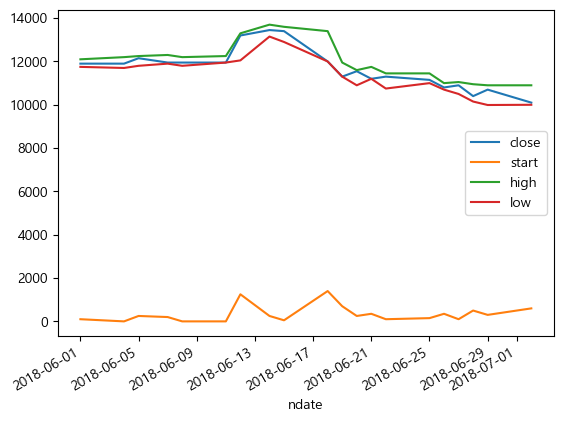

In [133]:
# 선 그래프(기본)
df1.plot()

<AxesSubplot:xlabel='ndate'>

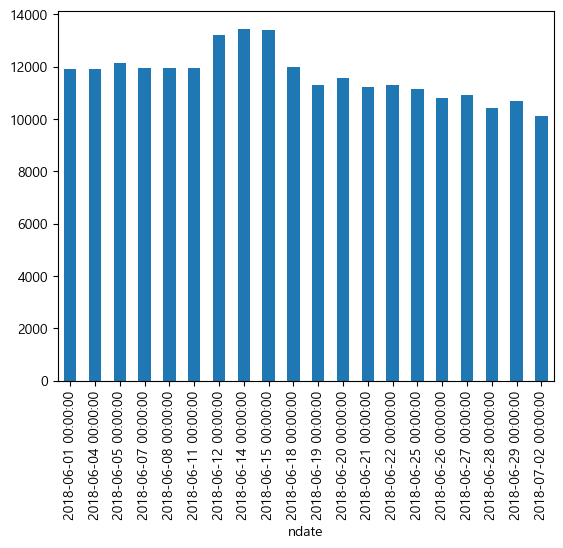

In [134]:
# 막대그래프: 일별 거래량
df1.close[::-1].plot(kind='bar')

<AxesSubplot:xlabel='ndate'>

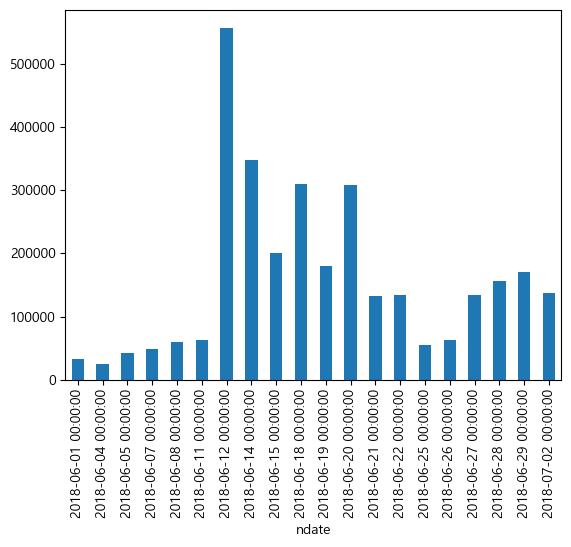

In [135]:
df.volume[::-1].plot(kind='bar')

<AxesSubplot:xlabel='ndate'>

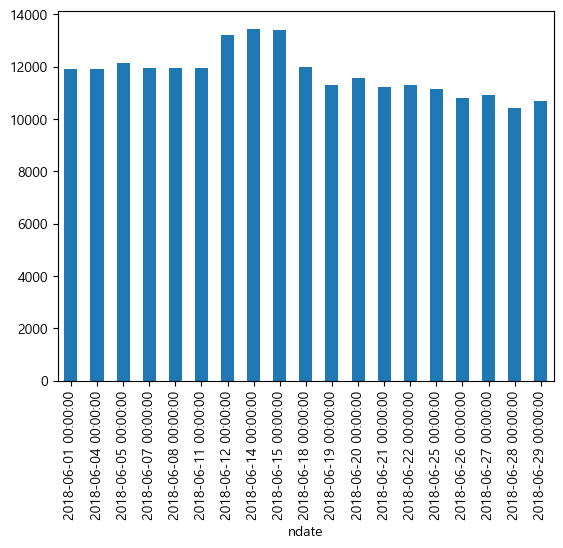

In [136]:
#6월 것만 뽑아서 보기
df1.loc['2018-6','close'][::-1].plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

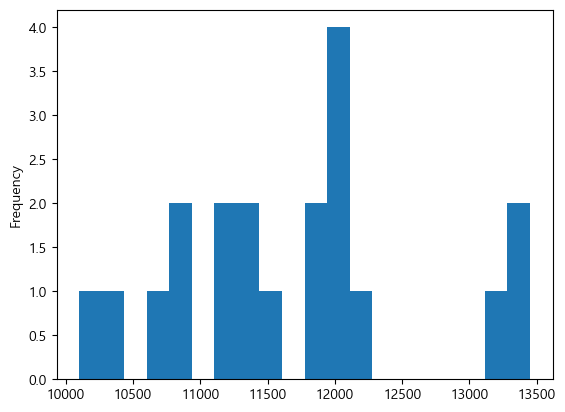

In [137]:
# 히스토그램: 변수의 도수분포
df1.close.plot(kind='hist',bins=20)

<AxesSubplot:xlabel='close', ylabel='volume'>

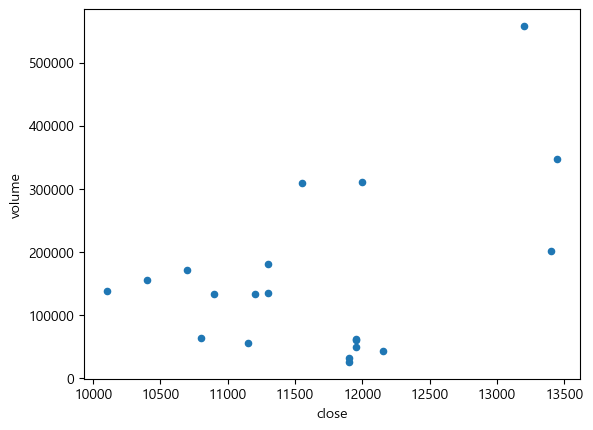

In [138]:
# scatter: 산점도(두 변수의 상관관계)
df.plot(x='close', y='volume', kind='scatter')

In [139]:
# 상관계수
df.corr()

,close,start,high,low,volume
close,1.000000,0.049573,0.941201,0.946297,0.441466
start,0.049573,1.000000,0.268876,-0.005684,0.686847
high,0.941201,0.268876,1.000000,0.945487,0.484145
low,0.946297,-0.005684,0.945487,1.000000,0.246323
volume,0.441466,0.686847,0.484145,0.246323,1.000000


#### Box plot 의미 해석

* IQR(Inter Quartile Range): 제 3사분위수 - 제1사분위수
* lower whisker: Q1 - 1.5 x IQR 이내인 값중에서 최솟값
* upper whisker: Q3 + 1.5 x IQR 이내인 값중에서 최댓값
* 이상치: lower whisker, upper whisker를 벗어나는 값

In [140]:
df.close.describe()

count       20.000000
mean     11662.500000
std        927.060294
min      10100.000000
25%      11087.500000
50%      11725.000000
75%      11962.500000
max      13450.000000
Name: close, dtype: float64

In [141]:
q1 = df.close.describe()['25%']   #이런 식으로 값을 뽑을 수 있음
q2 = df.close.describe()['mean']
q1, q2

(11087.5, 11662.5)

<AxesSubplot:>

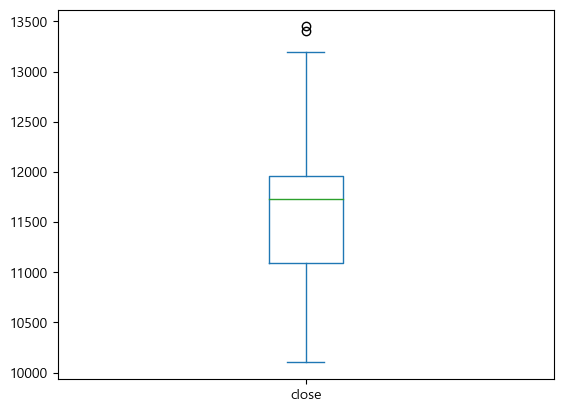

In [142]:
# box plot(박스 플랏)

# 박스의 아래선이 25%, 가운데 초록선이 50%, 윗선이 75%
# 맨 위 선분이 max, 아래 선분이 min (단, 박스 길이의 1.5배 범위 내에 있는만큼만)
# 그 외 범위는 이상치로 간주

df.close.plot(kind='box')

In [143]:
q1 = df.close.describe()['25%']
q3 = df.close.describe()['75%']
iqr = q3 - q1

abv = df[(df['close'] <= q1-(iqr*1.5)) | (df['close'] >= q3+(iqr*1.5))]
# 이상치(lower whisker, upper whisker)
abv

,date,close,start,high,low,volume
ndate,,,,,,
2018-06-15,2018-06-15,13400,50,13600,12900,201376
2018-06-14,2018-06-14,13450,250,13700,13150,347451


In [144]:
# upper whisker = 13275.0   (이 이상은 전부 이상치)
df.sort_values('close', ascending=False)[['close']].head()

,close
ndate,
2018-06-14,13450
2018-06-15,13400
2018-06-12,13200
2018-06-05,12150
2018-06-18,12000


,date,close,start,high,low,volume
ndate,,,,,,
2018-06-18,2018-06-18,12000,1400,13400,12000,309787


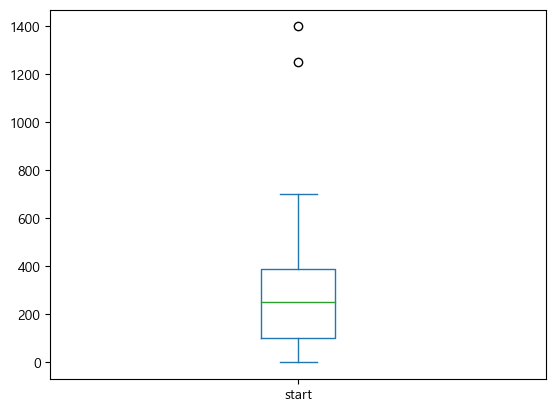

In [145]:
# start 칼럼의 이상치 탐색
df.start.plot(kind='box')    #박스 플랏

q1 = df.start.describe()['25%']     #제1사분위수
q3 = df.start.describe()['75%']     #제3사분위수
iq = (q3-q1)*1.5    #1.5 IQR

abv = df[(df['start'] <= q1-iqr) | (df['start'] >= q3+iqr)]   #이상치
abv

In [146]:
# lower whisker = -775.0
# upper whisker = 1262.5
print(df.sort_values('start', ascending=False)[['start']].head())
print(df.sort_values('start', ascending=False)[['start']].tail())

            start
ndate            
2018-06-18   1400
2018-06-12   1250
2018-06-19    700
2018-07-02    600
2018-06-28    500
            start
ndate            
2018-06-01    100
2018-06-15     50
2018-06-11      0
2018-06-08      0
2018-06-04      0


In [147]:
# 남북한 반도별 발전량 데이터셋
dfep = pd.read_excel('../dataset/df_ep.xlsx')
dfep.set_index('year',inplace=True)
dfep.head()

,south,notth
year,,
1990,1077,277
1991,1186,263
1992,1310,247
1993,1444,221
1994,1650,231


<AxesSubplot:xlabel='year'>

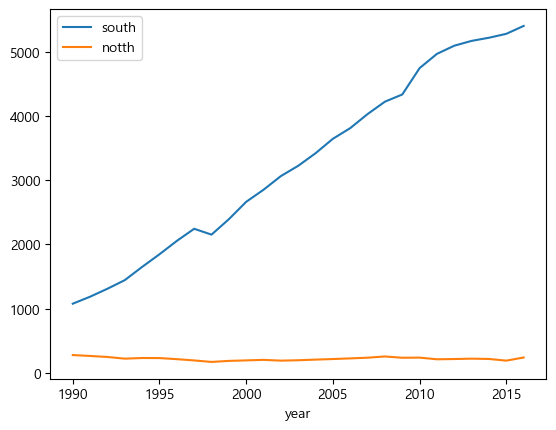

In [25]:
dfep.plot()

### Matplotlib
- 파이썬에서 사용되는 대표적인 데이터 시각화 라이브러리. 
- 2D, 3D 그래프, 히스토그램, 산점도, 파이차트 등 다양한 그래프를 지원하며, 
- 사용자가 그래프의 세부적인 설정을 조절할 수 있도록 다양한 옵션을 제공
- 핵심적인 개념은 Figure(그림)와 Axes(축)
- Figure는 그래프 전체를 의미하며, 하나의 Figure에 여러 개의 Axes를 추가하여 서로 다른 그래프를 그림 
- Axes는 Figure 내부의 그래프 영역을 의미하며, x축과 y축을 포함한 그래프 요소들을 생성하는 역할

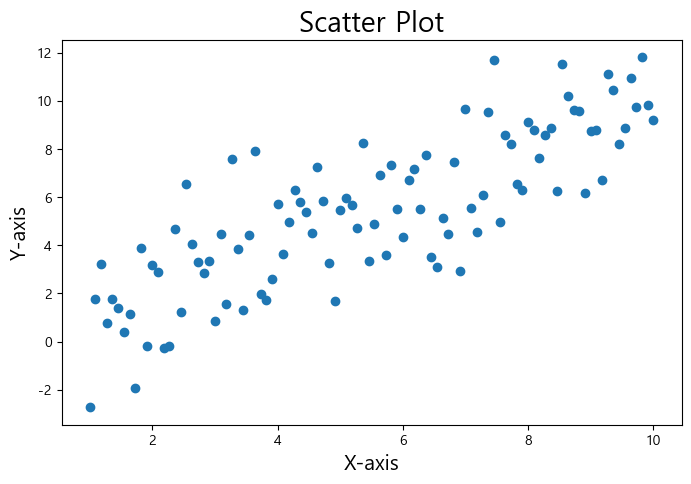

In [26]:
import matplotlib.pyplot as plt

# 데이터 생성
x1=[1,2,3,4,5]
y1=[2,4,6,8,10]

x2=np.linspace(1,10,100)   #1~10 사이를100개로 나눠라
y2=[]
for i in x2:
    r = i+np.random.normal(0,2)
    y2.append(r)

# 그래프 창 가로세로 길이 설정
plt.figure(figsize=(8,5))

# 산점도 그래프 그리기
plt.scatter(x2,y2)

#그래프 제목, x축, y축
plt.title('Scatter Plot', size=20)
plt.xlabel('X-axis', size=15)
plt.ylabel('Y-axis', size=15)

#그래프 출력(print)
plt.show()

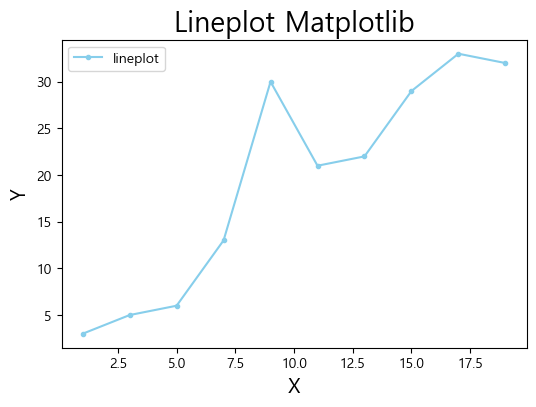

In [27]:
x=np.arange(1,21,2)
y=np.array([3,5,6,13,30,21,22,29,33,32])

plt.figure(figsize=(6,4))   #그래프 창 크기

plt.plot(x,y, color='skyblue', marker='o', markersize=3)    #그래프 선

plt.title('Lineplot Matplotlib', size=20)    #제목
plt.xlabel('X',size=15)   # x축
plt.ylabel('Y',size=15)   # y축

plt.legend(labels=['lineplot'])    #라벨

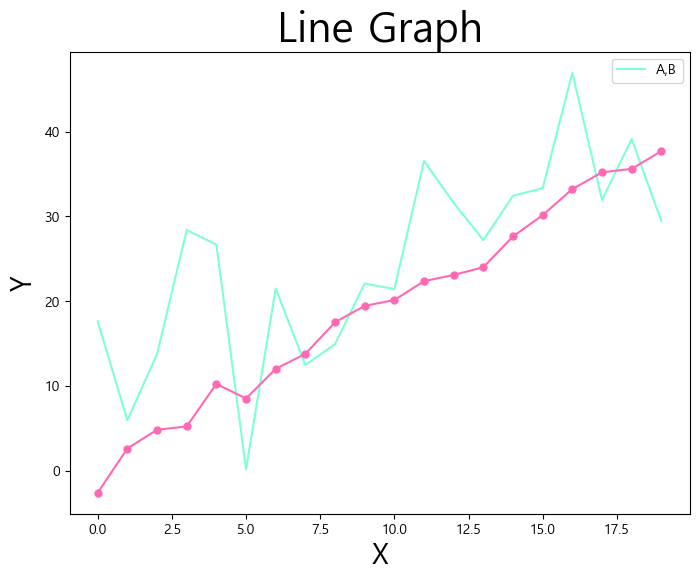

In [148]:
# 그래프 2개 동시에 그리기
np.random.seed(0)
x=np.arange(20)
y1=np.arange(20)*2 + np.random.randn(20)*10
y2=np.arange(20)*2 + np.random.randn(20)

plt.figure(figsize=(8,6))

plt.plot(x,y1, color='aquamarine')
plt.plot(x,y2, color='hotpink', marker='o', markersize=5)

plt.title('Line Graph', size=30)
plt.xlabel('X',size=20)
plt.ylabel('Y',size=20)

plt.legend(labels=['A,B'])    #라벨

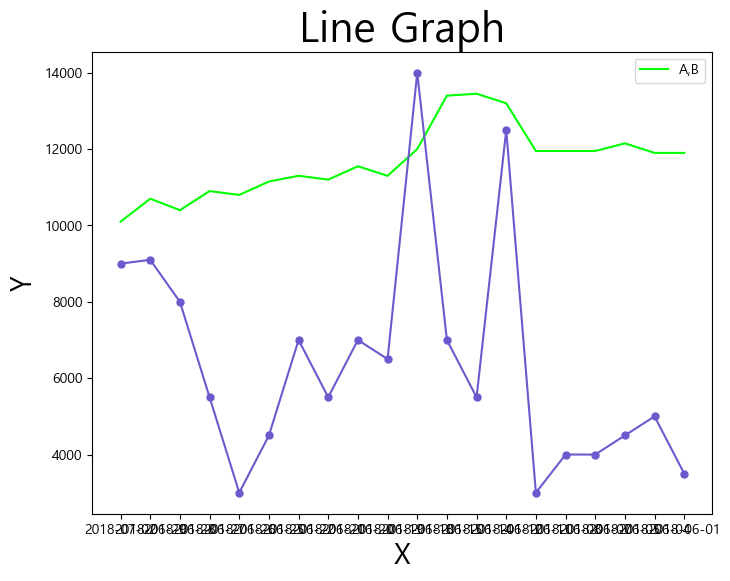

In [149]:
# 그래프 연습
df=pd.read_pickle('../dataset/sprice.pkl')    #주가 데이터셋

np.random.seed(0)
x=df.date
y1=df.close                #종가(종료 시점 가격)
y2=(df.high-df.low)*10     #고점,저점 차이

plt.figure(figsize=(8,6))

plt.plot(x,y1, color='lime')
plt.plot(x,y2, color='slateblue', marker='o', markersize=5)

plt.title('Line Graph', size=30)
plt.xlabel('X',size=20)
plt.ylabel('Y',size=20)

plt.legend(labels=['A,B'])    #라벨

Text(0.5, 0, 'x')

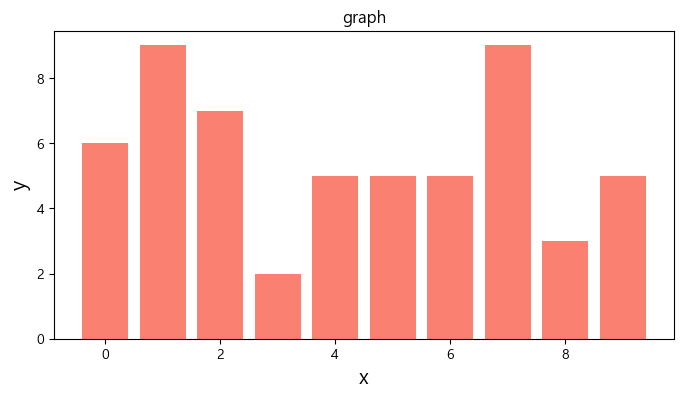

In [150]:
# 수직 막대그래프
y=np.random.randint(2,10,size=10)
x=range(len(y))

plt.figure(figsize=(8,4))
plt.bar(x,y, width=0.8, color='salmon')

plt.title('graph')
plt.ylabel('y', size=15)
plt.xlabel('x', size=15)

<BarContainer object of 10 artists>

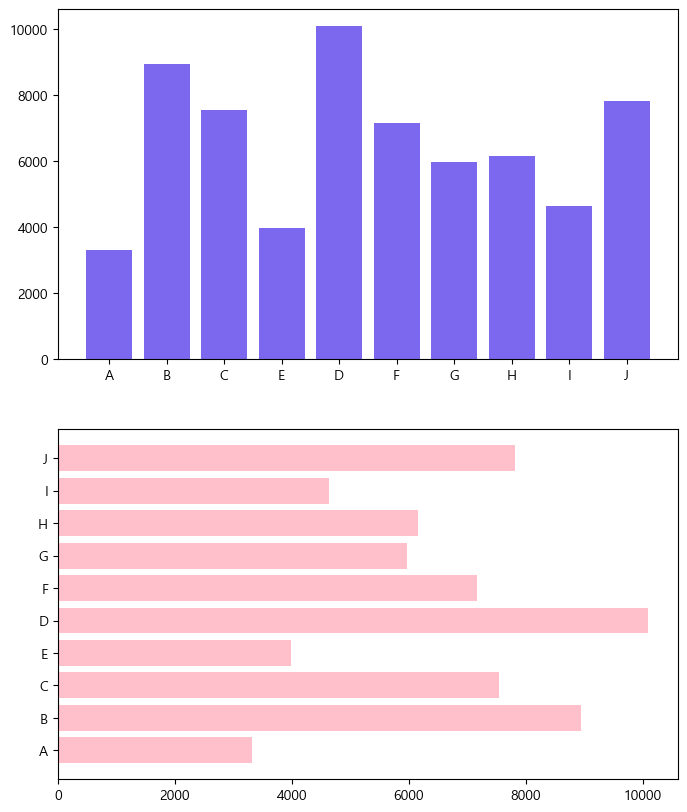

In [151]:
# 수직/수평 막대그래프
x=np.random.normal(5000,2000,10)    #값(소득평균)
y=list('ABCEDFGHIJ')   #지역명

fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(2,1,1)   # 2행 1열의 첫 번째에 그래프를 넣어라
ax2 = fig.add_subplot(2,1,2)   # 2행 1열 두 번째

ax1.bar(y,x, color='mediumslateblue')  # x,y값 반대로 넣어주기
ax2.barh(y,x, color='pink')  # x,y값 반대로 넣어주기

Text(0, 0.5, 'month')

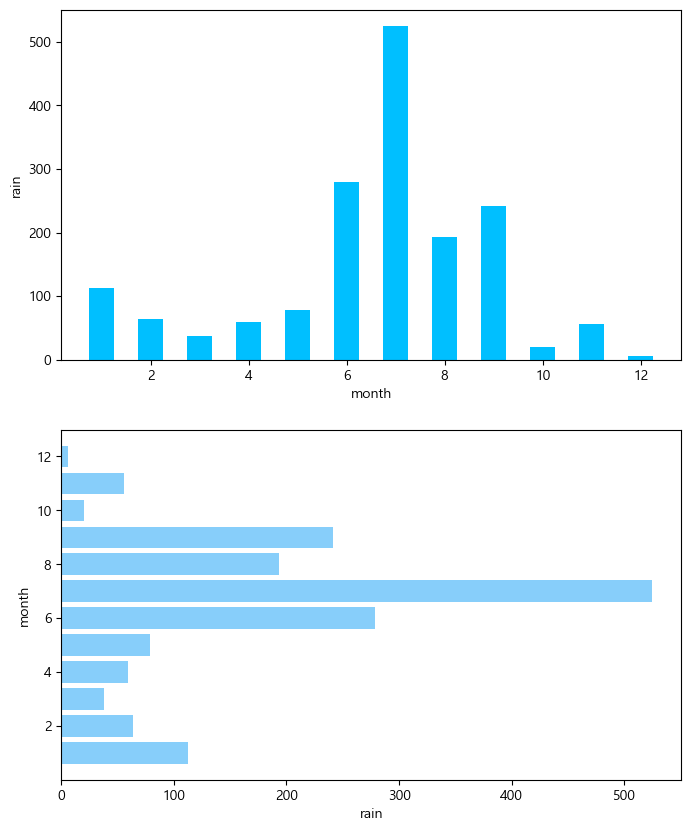

In [152]:
# 막대그래프 연습
x=np.arange(1,13)   #월
y=[112.6, 64.2, 37.9, 59.1, 78.8, 278.9, 524.1, 193.1, 241.7, 20.5, 55.6, 6.3]    #창원지방 월별 강수량

fig = plt.figure(figsize=(8,10))     # 이 창의
ax1 = fig.add_subplot(2,1,1)   # 2행 1열 첫 번째 자리에 그래프를 넣어라
ax2 = fig.add_subplot(2,1,2)   # 2행 1열 두 번째

ax1.bar(x,y, width=0.5, color='deepskyblue')
# 수직 그래프는 width로 그래프 두께 조절
ax1.set_xlabel('month')
ax1.set_ylabel('rain')

ax2.barh(x,y, color='lightskyblue')         # 그림에는 x축, y축 반대로 들어감
# 수평 그래프는 height로 그래프 두께 조절
ax2.set_xlabel('rain')
ax2.set_ylabel('month')

<BarContainer object of 9 artists>

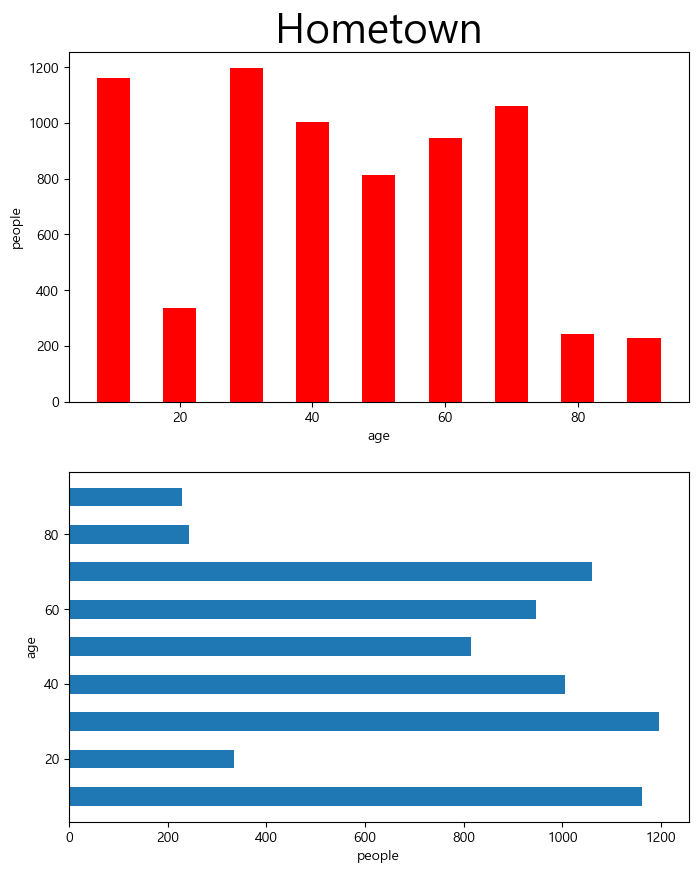

In [153]:
# 동완님 코드: 마을 나이대별 사람 수
np.random.seed(1)
x = np.arange(10,100,10)
y = np.random.randint(100,1500,9)

fig = plt.figure(figsize=(8,10))

ax1 = fig.add_subplot(2,1,1)
plt.title("Hometown",size=30)
plt.xlabel("age",size=10)
plt.ylabel("people",size=10)
ax2 = fig.add_subplot(2,1,2)
plt.ylabel("age",size=10)
plt.xlabel("people",size=10)


ax1.bar(x,y,color="red",width=5)
ax2.barh(x,y,height=5)

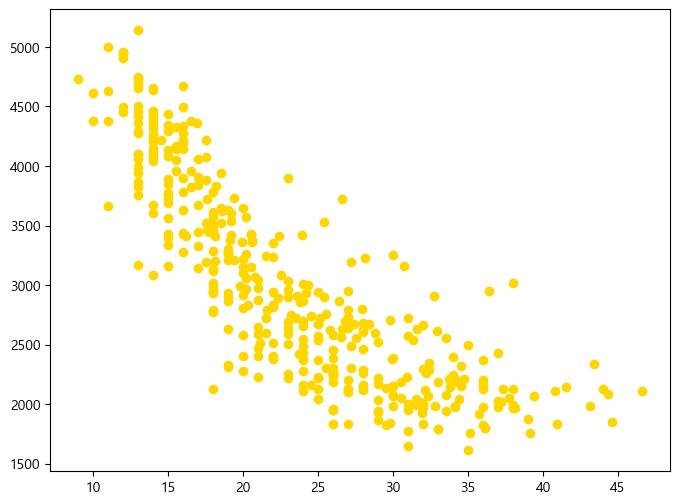

In [154]:
# 스캐터 플랏
dfat = pd.read_excel('../dataset/auto-mpg.xlsx')
x=dfat.mpg
y=dfat.weight

plt.figure(figsize=(8,6))
plt.scatter(x,y,color='gold')

In [155]:
dfat.mpg.value_counts()

13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
31.9     1
16.9     1
18.2     1
22.3     1
44.0     1
Name: mpg, Length: 129, dtype: int64

(array([ 3., 10., 40., 38., 36., 37., 30., 31., 21., 33., 24., 24., 20.,
        18., 13.,  9.,  4.,  1.,  5.,  1.]),
 array([ 9.  , 10.88, 12.76, 14.64, 16.52, 18.4 , 20.28, 22.16, 24.04,
        25.92, 27.8 , 29.68, 31.56, 33.44, 35.32, 37.2 , 39.08, 40.96,
        42.84, 44.72, 46.6 ]),
 <BarContainer object of 20 artists>)

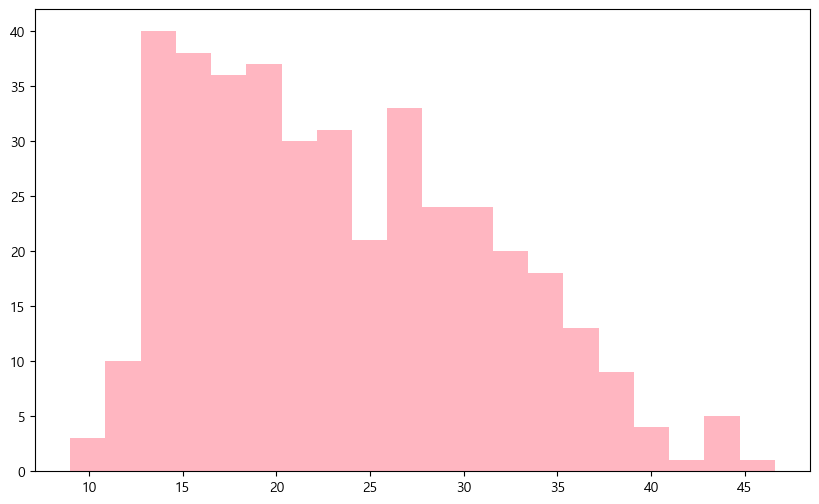

In [156]:
# 히스토그램: mpg
plt.figure(figsize=(10,6))
plt.hist(dfat.mpg, bins=20, color='lightpink')

# x축: mpg
# y축: 구간 내 해당 데이터 개수

(array([ 5., 26., 45., 45., 25., 34., 24., 30., 17., 20., 23., 17., 17.,
        12., 17., 17.,  8., 10.,  4.,  2.]),
 array([1613.  , 1789.35, 1965.7 , 2142.05, 2318.4 , 2494.75, 2671.1 ,
        2847.45, 3023.8 , 3200.15, 3376.5 , 3552.85, 3729.2 , 3905.55,
        4081.9 , 4258.25, 4434.6 , 4610.95, 4787.3 , 4963.65, 5140.  ]),
 <BarContainer object of 20 artists>)

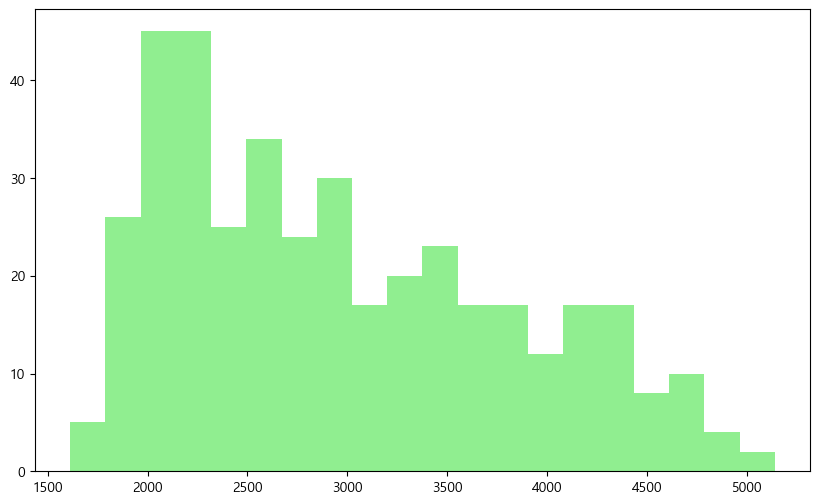

In [157]:
# 히스토그램: weight
plt.figure(figsize=(10,6))
plt.hist(dfat.weight, bins=20, color='lightgreen')

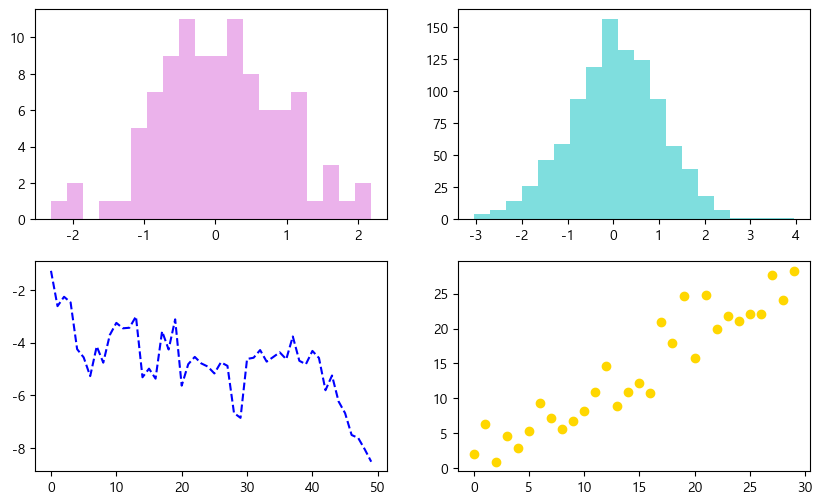

In [158]:
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.hist(np.random.randn(100), bins=20, color='m', alpha=0.3)     # alpha:투명도
ax2.hist(np.random.randn(1000), bins=20, color='c', alpha=0.5)
ax3.plot(np.random.randn(50).cumsum(), 'b--')    # cumsum(): 이전 값들의 누적합
ax4.scatter(np.arange(30), np.arange(30)+3*np.random.randn(30), color='gold')

<BarContainer object of 398 artists>

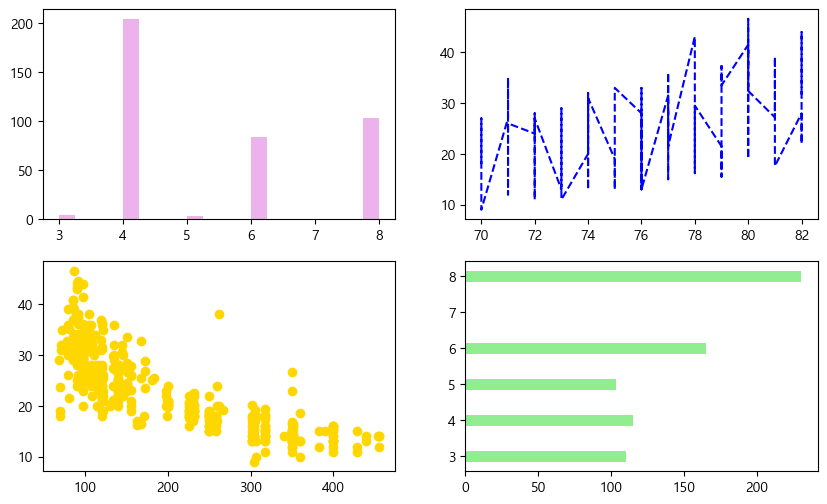

In [159]:
# 과제: 4개 데이터셋을 히스토, 막대, 선, 산점도로 뽑기
dfat.replace('?',np.nan, inplace=True)
dfat.dropna()

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.hist(dfat.cylinders, bins=20, color='m', alpha=0.3)
# 실린더 개수 분포 확인
ax2.plot(dfat['model year'], dfat['mpg'], 'b--')
ax3.scatter(dfat['displacement'], dfat['mpg'], color='gold')
# 배기량과 연비의 관계
ax4.barh(dfat['cylinders'], dfat['horsepower'], color='lightgreen', height=0.3)
# 실린더 개수별 마력

(array([2.00000e+00, 7.00000e+00, 7.00000e+00, 1.70000e+01, 6.50000e+01,
        1.50000e+02, 3.59000e+02, 7.36000e+02, 1.60000e+03, 3.34700e+03,
        6.43200e+03, 1.22380e+04, 2.19910e+04, 3.74640e+04, 6.20310e+04,
        9.76000e+04, 1.48284e+05, 2.14298e+05, 2.96773e+05, 3.92667e+05,
        4.96920e+05, 6.02994e+05, 7.00059e+05, 7.75846e+05, 8.23265e+05,
        8.37690e+05, 8.13825e+05, 7.57223e+05, 6.74839e+05, 5.73706e+05,
        4.68258e+05, 3.65847e+05, 2.73191e+05, 1.94858e+05, 1.32662e+05,
        8.64850e+04, 5.42530e+04, 3.24320e+04, 1.87540e+04, 1.02360e+04,
        5.37700e+03, 2.86600e+03, 1.30800e+03, 5.82000e+02, 2.83000e+02,
        1.07000e+02, 3.90000e+01, 1.90000e+01, 3.00000e+00, 5.00000e+00]),
 array([-5.33501329, -5.12467675, -4.91434022, -4.70400368, -4.49366714,
        -4.28333061, -4.07299407, -3.86265753, -3.65232099, -3.44198446,
        -3.23164792, -3.02131138, -2.81097484, -2.60063831, -2.39030177,
        -2.17996523, -1.96962869, -1.75929216, -1

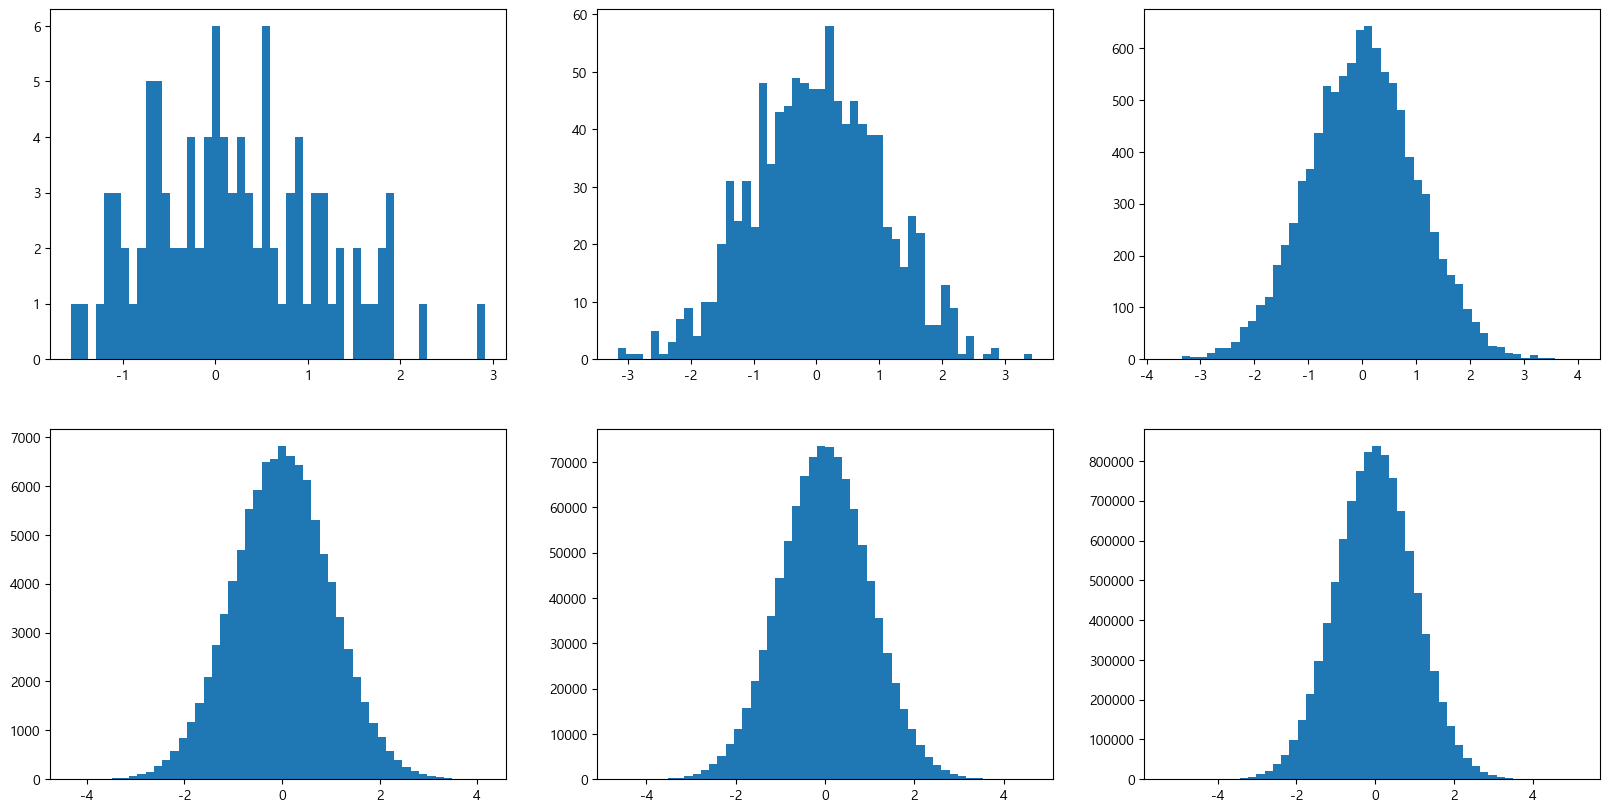

In [160]:
# 샘플 수의 변화에 따른 분포 모습

fig, axes = plt.subplots(2,3, figsize=(20,10))
axes[0,0].hist(np.random.randn(100),bins=50)
axes[0,1].hist(np.random.randn(1000),bins=50)
axes[0,2].hist(np.random.randn(10000),bins=50)
axes[1,0].hist(np.random.randn(100000),bins=50)
axes[1,1].hist(np.random.randn(1000000),bins=50)
axes[1,2].hist(np.random.randn(10000000),bins=50)

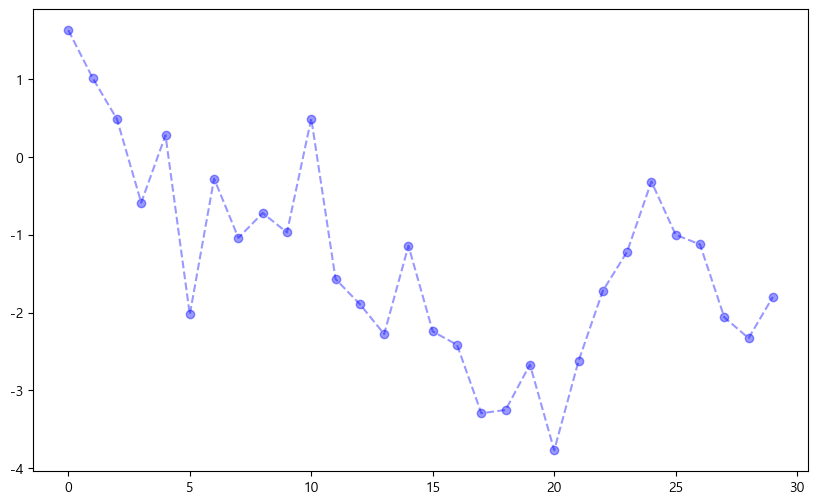

In [161]:
import numpy as np
from numpy.random import randn

np.random.seed(1)
plt.figure(figsize=(10,6))
plt.plot(randn(30).cumsum(), linestyle='dashed', color='b', marker='o', alpha=0.4)

In [162]:
plt.style.available     # plt 사용할 수 있는 모든 스타일 뽑기

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

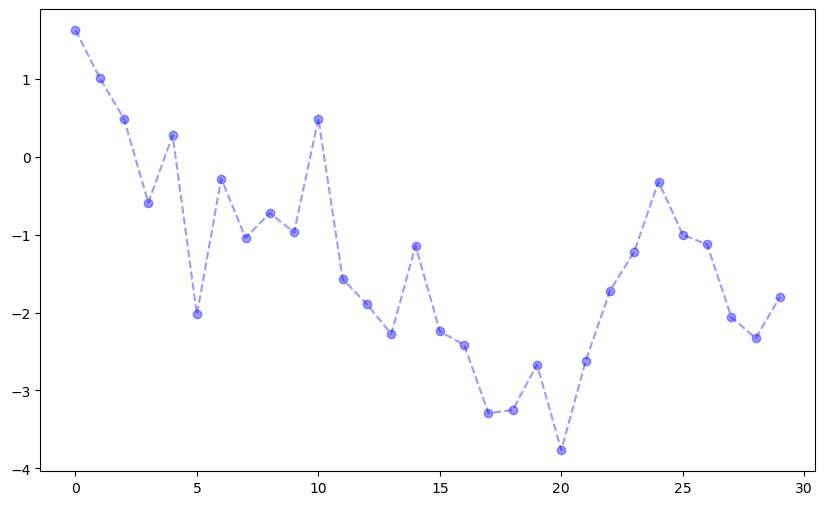

In [163]:
plt.style.use('ggplot')    #한 번 하면 메모리에 기억되서 다시 디폴트로 바꿔줘야 함
plt.style.use('default')

np.random.seed(1)
plt.figure(figsize=(10,6))
plt.plot(randn(30).cumsum(), linestyle='dashed', color='b', marker='o', alpha=0.4)

Text(0, 0.5, 'sum')

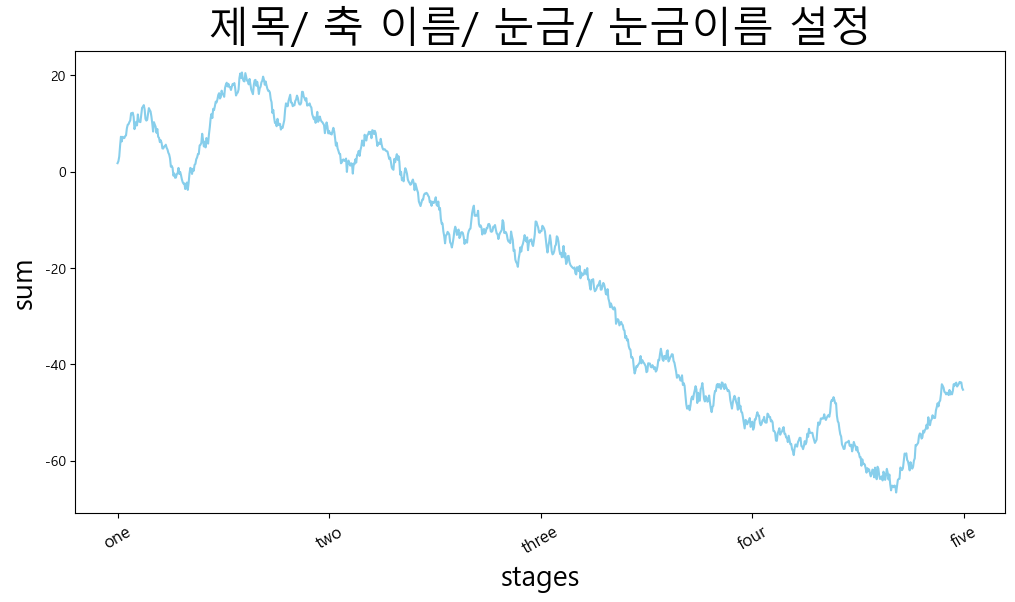

In [164]:
np.random.seed(0)
data = np.random.randn(1000)
cdata = data.cumsum()

from matplotlib import rc
rc('font', family='Malgun Gothic')      #한글 폰트설정
plt.rcParams['axes.unicode_minus']=False      #마이너스 부호 출력 설정

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)

ax.plot(cdata, color='skyblue')

ticks = ax.set_xticks([0,250,500,750,1000])
# x축 눈금표시(각각의 지점에 점 찍음), y축 설정은 set_yticks
labels = ax.set_xticklabels(['one','two','three','four', 'five'], rotation=30, fontsize='large')
# 설정한 눈금들의 이름, 글자 회전, 글자 크기 설정

ax.set_title('제목/ 축 이름/ 눈금/ 눈금이름 설정',size=30)
ax.set_xlabel('stages',size=20)
ax.set_ylabel('sum',size=20)

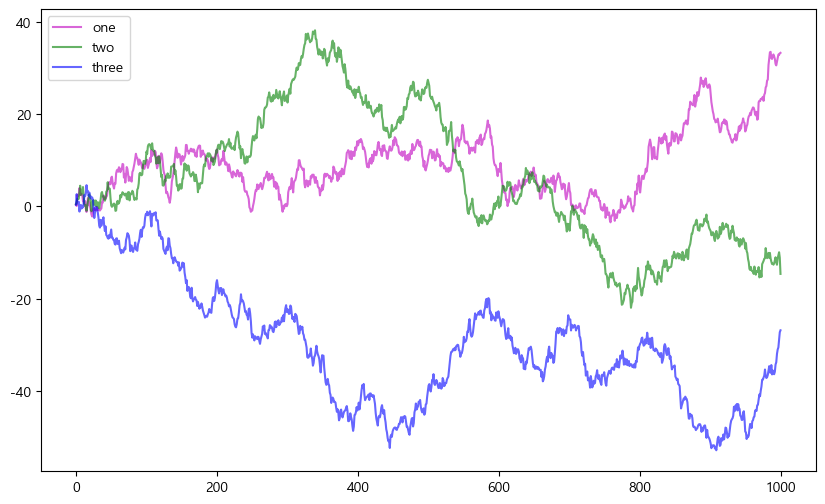

In [165]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)

np.random.seed(5)
ax.plot(randn(1000).cumsum(), 'm', alpha=0.6, label='one')
ax.plot(randn(1000).cumsum(), 'g', alpha=0.6, label='two')
ax.plot(randn(1000).cumsum(), 'b', alpha=0.6, label='three')
plt.legend(loc='best')
# 한 창에 그래프 여러개 띄우고 싶으면 subplot를 1로 설정하고 다 거기에 넣기

In [166]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [167]:
df.age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [168]:
def get_age(age):
    cat=''
    if age<20: cat='young'
    elif age<40: cat='adult'  
    elif age<60: cat='nature'  
    else: cat='elder'
    return cat

df['age_cat'] =df['age'].apply(lambda x: get_age(x))
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cat
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult


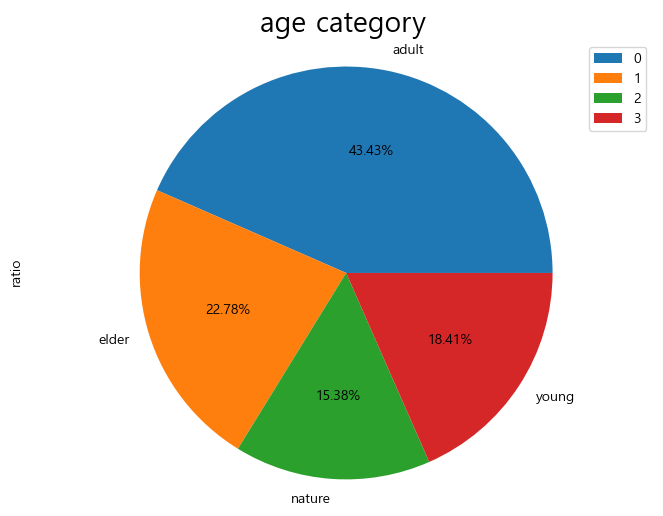

In [169]:
df['ratio']=1
dfage = df.groupby('age_cat').sum()     #그룹화 해서 나이대별 데이터수 카운트 저장
dfage

dfage.ratio.plot(kind='pie', figsize=(8,6), autopct='%.2f%%', startangle=0)
# autopct='%.2f%%' -> 소수 2자리까지만 표기, 뒤에 '%'는 문자로 인식(%%)
# startangle: 부채꼴이 시작되는 각도 (디폴트는 0, x축 각도)

plt.title('age category', size=20)
plt.axis('equal')
plt.legend(labels=df.age_cat.index, loc='best')

In [170]:
def get_fare(fare):
    cat=''
    if fare<15: cat='최저가'
    elif fare<35: cat='저가'  
    elif fare<75: cat='일반'
    elif fare<150: cat='고가'
    else: cat='프리미엄'
    return cat

df['fare_cat'] =df['fare'].apply(lambda x: get_fare(x))
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cat,ratio,fare_cat
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,adult,1,최저가
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult,1,일반
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult,1,최저가
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult,1,일반
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult,1,최저가


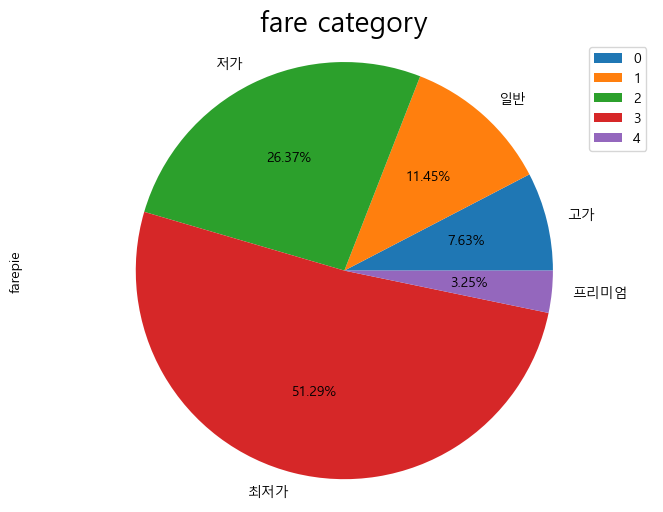

In [171]:
df['farepie']=1
dffare = df.groupby('fare_cat').sum()
dffare

dffare.farepie.plot(kind='pie', figsize=(8,6), autopct='%.2f%%', startangle=0)
# autopct='%.2f%%' -> 소수 2자리까지만 표기, 뒤에 '%'는 문자로 인식(%%)
# startangle: 부채꼴이 시작되는 각도 (디폴트는 0, x축 각도)

plt.title('fare category', size=20)
plt.axis('equal')
plt.legend(labels=df.fare_cat.index, loc='best')

In [172]:
df.fare_cat.value_counts()

최저가     457
저가      235
일반      102
고가       68
프리미엄     29
Name: fare_cat, dtype: int64

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4
5,A,4
6,A,4
7,A,5
8,A,5
9,A,6


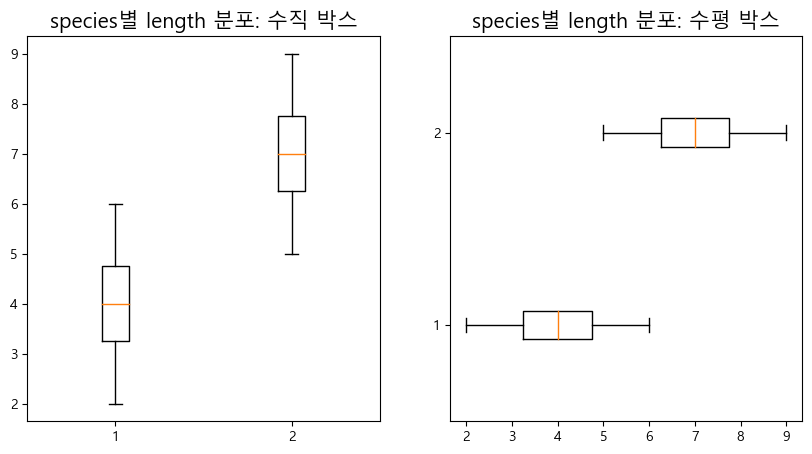

In [173]:
df = pd.read_csv('../dataset/4_fm2.csv')   #물고기(A종,B종)의 길이

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.boxplot(x= [df[df.species=='A']['length'],
           df[df.species=='B']['length']])
ax2.boxplot(x= [df[df.species=='A']['length'],
           df[df.species=='B']['length']], vert=False)

ax1.set_title('species별 length 분포: 수직 박스', size=15)
ax2.set_title('species별 length 분포: 수평 박스', size=15)
df

In [174]:
# 
data = pd.read_csv('../dataset/data.csv', index_col=0)
data.head()
data.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [175]:
data['International Reputation'].value_counts()

1.0    16532
2.0     1261
3.0      309
4.0       51
5.0        6
Name: International Reputation, dtype: int64

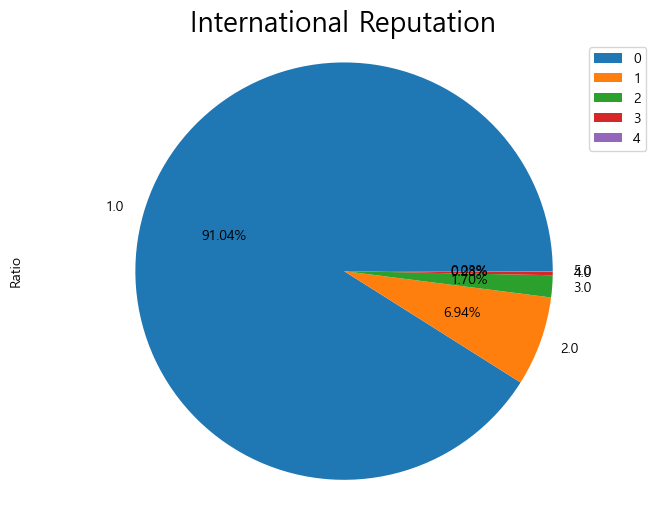

In [176]:
data['Ratio'] = 1         # 이름 다른거 넣어도 상관없음. 새로운 열 추가

dfIR = data.groupby('International Reputation').sum()           # 함수이기에 () 있어야 함

dfIR.Ratio.plot(kind='pie',
                figsize=(8,6),
                autopct='%.2f%%',
                startangle=0)
plt.title('International Reputation', size=20)
plt.axis('equal') # 가로와 세로의 비율을 동일하게 설정
plt.legend(labels=data['International Reputation'].index, loc='best')          # df.(){} 없어야 하고 df에 바로 쓰려면 (),[] 필요

In [177]:
data.Wage.value_counts()

€1K      4900
€2K      2827
€3K      1857
€4K      1255
€5K       869
         ... 
€190K       1
€235K       1
€93K        1
€405K       1
€565K       1
Name: Wage, Length: 144, dtype: int64

In [178]:
import re
def get_num(x):
    result = int(re.sub('[^0-9]','',x))
    return result
data['Nwage'] = data.Wage.apply(lambda x:get_num(x))
data[['Wage','Nwage']].head()

,Wage,Nwage
0,€565K,565
1,€405K,405
2,€290K,290
3,€260K,260
4,€355K,355


<AxesSubplot:ylabel='Frequency'>

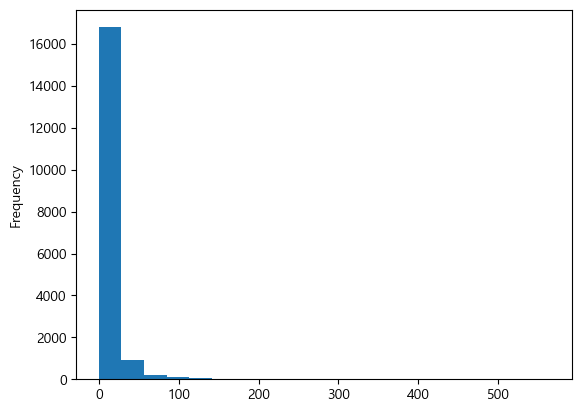

In [179]:
data.Nwage.plot(kind='hist',bins=20)

In [180]:
data.Nwage.describe()

count    18207.000000
mean         9.731312
std         21.999290
min          0.000000
25%          1.000000
50%          3.000000
75%          9.000000
max        565.000000
Name: Nwage, dtype: float64

<AxesSubplot:ylabel='Frequency'>

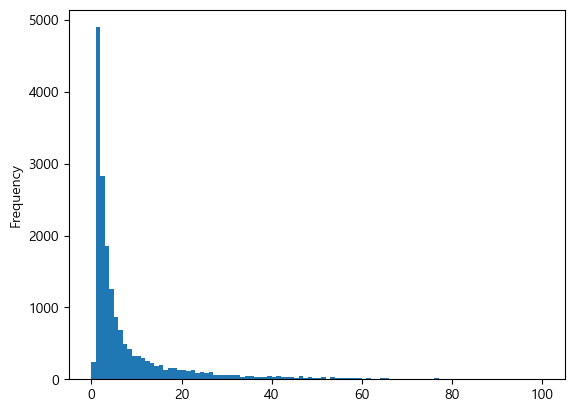

In [181]:
data.Nwage[data.Nwage <= 100].plot(kind='hist',bins=100)

In [182]:
data.Nwage[data.Nwage <= 100].describe()

count    18022.000000
mean         8.090556
std         12.874957
min          0.000000
25%          1.000000
50%          3.000000
75%          8.000000
max        100.000000
Name: Nwage, dtype: float64

In [183]:
# 로그변환 : np.log1p(x)

import numpy as np
def lognum(x):
    result = np.log1p(x)
    return result

data['Lwage'] = data.Nwage.apply(lambda x:lognum(x))
data[['Nwage','Lwage']].head()

,Nwage,Lwage
0,565,6.338594
1,405,6.006353
2,290,5.673323
3,260,5.564520
4,355,5.874931


In [184]:
data.Lwage.describe()

count    18207.000000
mean         1.678575
std          1.019503
min          0.000000
25%          0.693147
50%          1.386294
75%          2.302585
max          6.338594
Name: Lwage, dtype: float64

## seaborn
: 파이썬의 시각화 라이브러리 중 하나로, matplotlib 라이브러리를 기반으로 하여 좀 더 다양한 시각화 기능과 스타일을 제공

#### seaborn의 특징

- matplotlib에 비해 더 간결하고 직관적인 API를 제공
- matplotlib의 스타일을 기본적으로 사용하지만, 좀 더 다양한 스타일을 제공
- 통계 분석에 사용되는 다양한 그래프를 제공
- pandas와 연동하여 데이터 시각화를 더욱 편리하게 수행

#### seaborn에서 제공하는 그래프
- relplot: 두 변수 간의 관계를 시각화하는 그래프
- scatterplot: 산점도 그래프
- lineplot: 선 그래프
- histplot: 히스토그램 그래프
- kdeplot: 밀도 그래프
- boxplot: 박스 그래프
- violinplot: 바이올린 그래프
- heatmap: 히트맵 그래프

<AxesSubplot:xlabel='Lwage', ylabel='Count'>

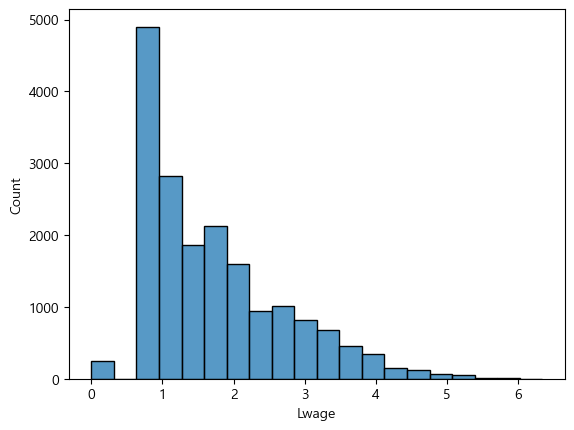

In [185]:
import seaborn as sns
sns.histplot(data.Lwage, bins=20)

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


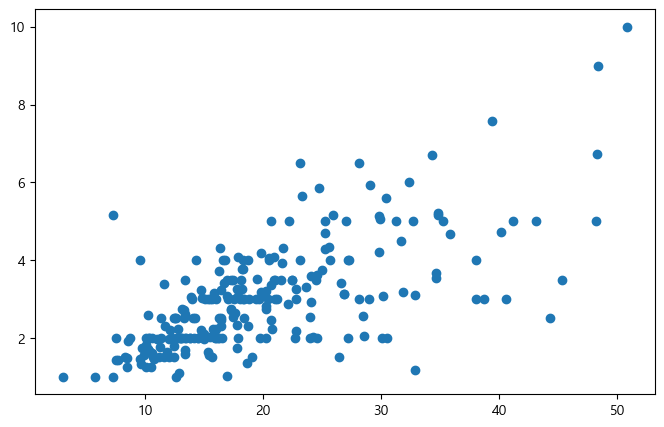

In [187]:
x=tips.total_bill
y=tips.tip

plt.figure(figsize=(8,5))
plt.scatter(x,y)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

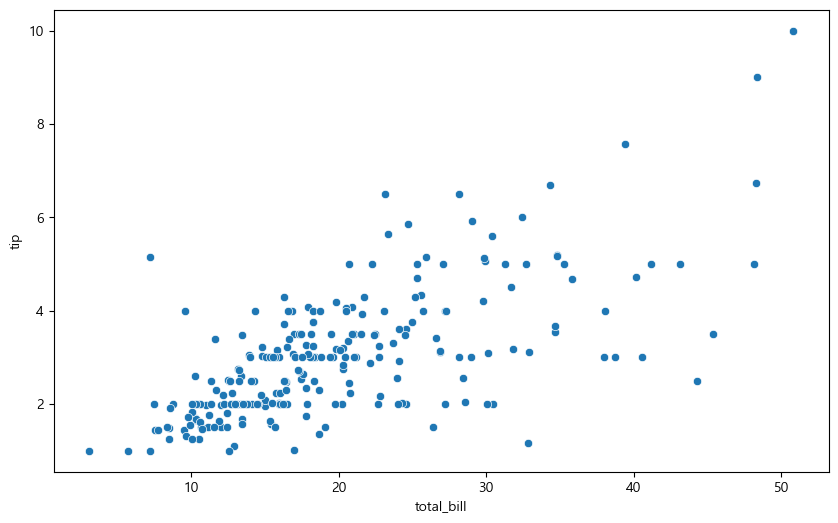

In [215]:
# scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(x=x,y=y,data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

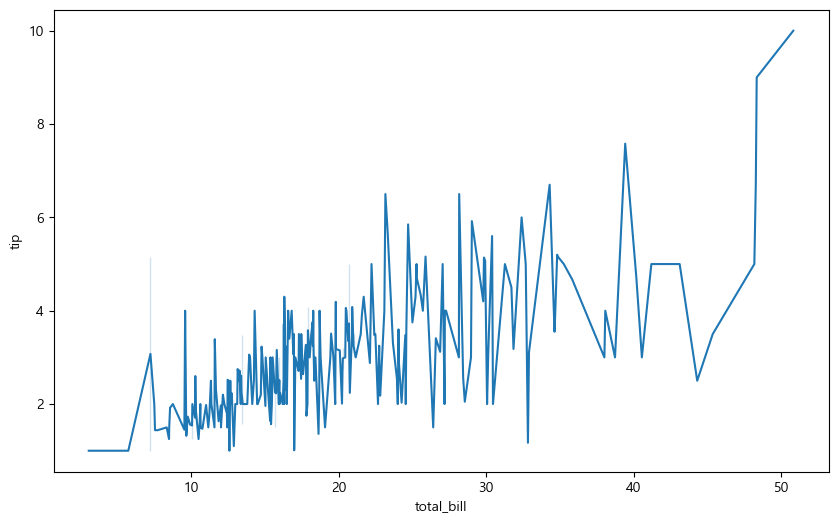

In [216]:
# lineplot
x=tips.total_bill
y=tips.tip
plt.figure(figsize=(10,6))
sns.lineplot(x=x,y=y)

#### lineplot 함수는 여러 가지 옵션을 제공하며, 이를 사용하여 선 그래프를 더욱 자세하게 설정할 수 있습니다.

- hue 옵션을 사용하여 'sex' 열의 값에 따라 선 그래프의 색상을 다르게 설정하고,
- style 옵션을 사용하여 'smoker' 열의 값에 따라 선 그래프의 스타일을 다르게 설정
- markers 옵션을 사용하여 데이터 포인트를 원형 모양으로 표시

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

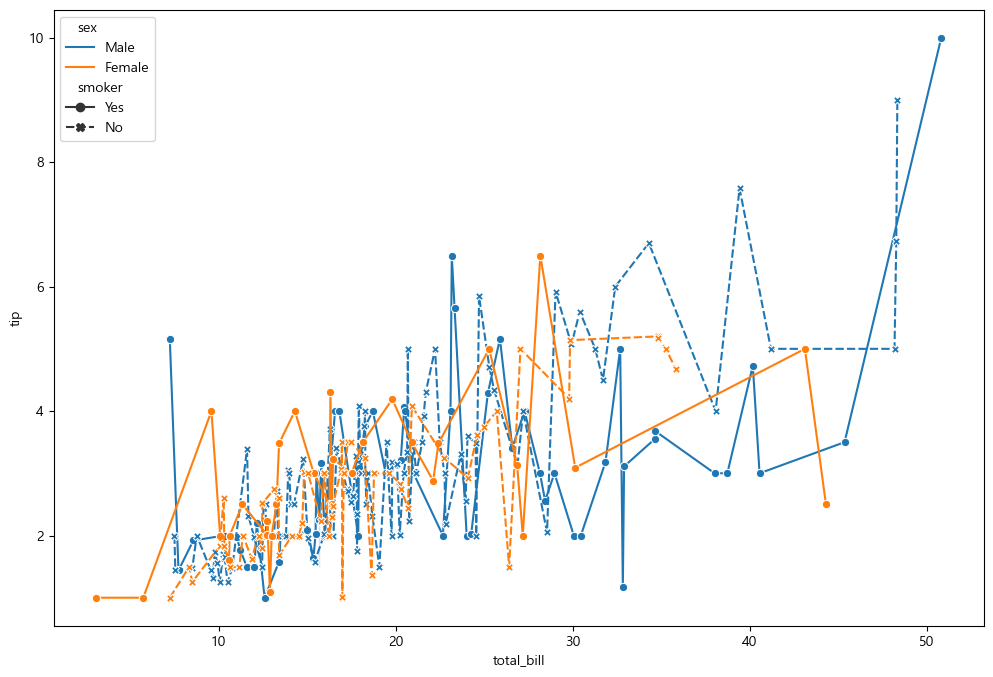

In [190]:
plt.figure(figsize=(12,8))
sns.lineplot(x='total_bill',y='tip',hue='sex',style='smoker',markers=True, data=tips)
# sns.lineplot(x='total_bill',y='tip',style='smoker',markers=True,  data=tips)

#### barplot : 범주형 변수에 대한 막대 그래프

- x축에는 "day" 열의 값, y축에는 "total_bill" 열의 값이 사용됨
- barplot 함수는 기본적으로 각 범주별로 y축 값의 평균과 오차 막대를 그리며,
- ci 옵션을 사용하여 오차 막대의 크기를 조절

<AxesSubplot:xlabel='day', ylabel='total_bill'>

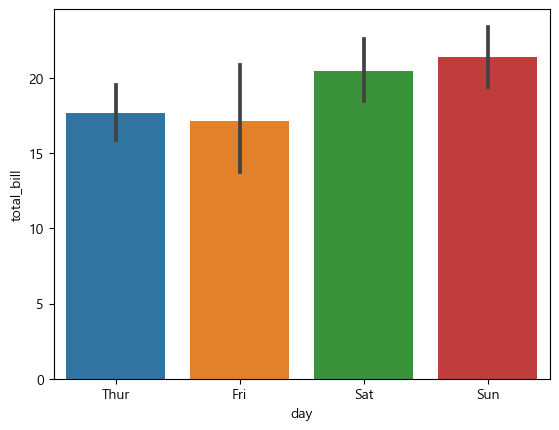

In [191]:
# barplot: 값들의 평균값, 오차범위 표시
sns.barplot(x='day',y='total_bill',data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

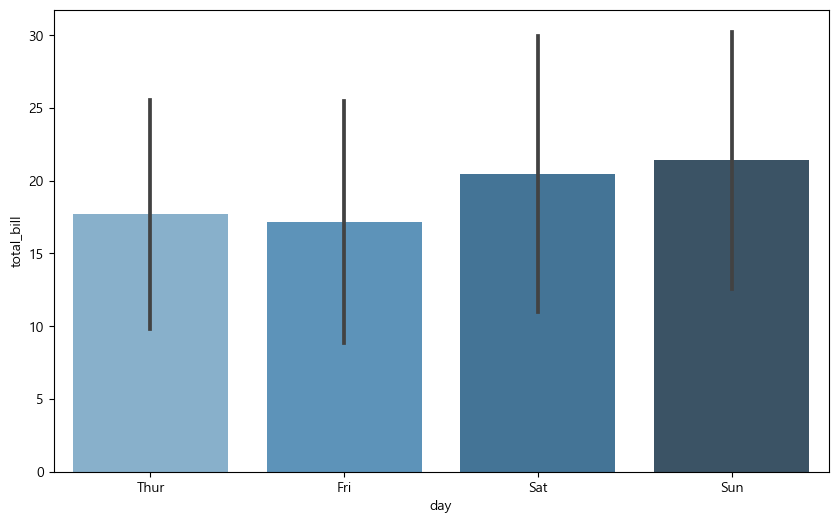

In [192]:
# ci 옶션에 'sd' 값을 사용. 이는 오차 막대의 크기를 y축 값의 표준편차로 설정
# palette 옵션을 사용하여 막대 그래프의 색상을 변경
plt.figure(figsize=(10,6))
sns.barplot(x='day',y='total_bill',ci='sd', palette='Blues_d', data=tips)

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

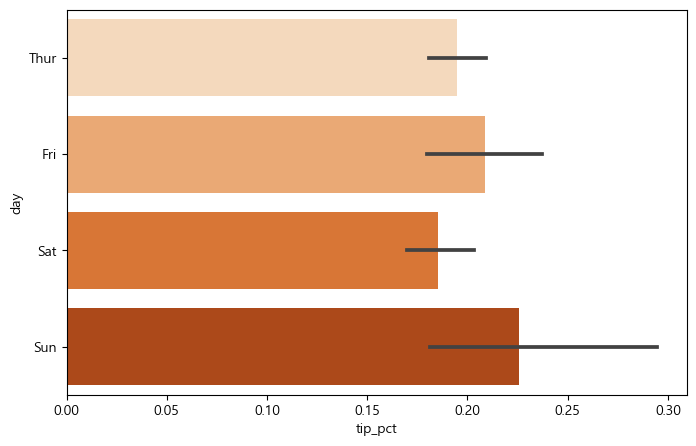

In [193]:
# q. 팁의 비중(tip_pct)을 구해서 요일별 팁의 비중을 보여주는 시각화를 수행하세요. 
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip']) # 마크업 기준

plt.figure(figsize=(8,5))
sns.barplot(x='tip_pct',y='day',palette='Oranges',data=tips, orient='h')

<AxesSubplot:xlabel='tip_pct', ylabel='time'>

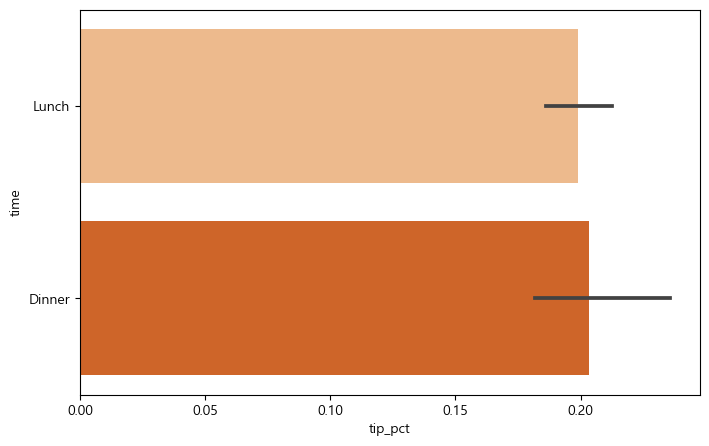

In [194]:
plt.figure(figsize=(8,5))
sns.barplot(x='tip_pct',y='time',palette='Oranges',data=tips, orient='h')
# orient='h': 수평 그래프 옵션

<AxesSubplot:xlabel='size', ylabel='count'>

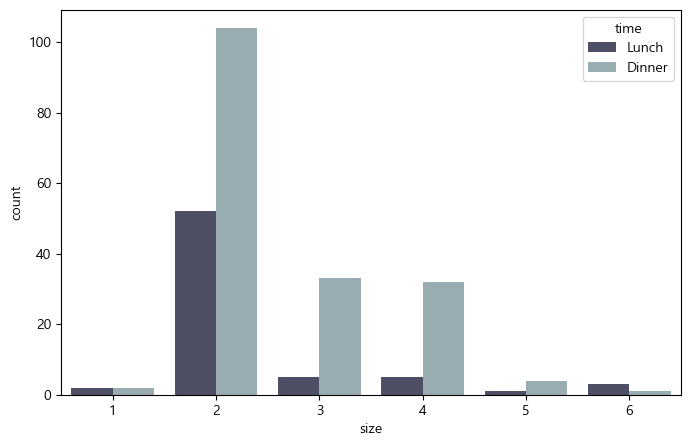

In [195]:
# countplot: 값의 개수를 기준으로
plt.figure(figsize=(8,5))
sns.countplot(x='size', hue='time', data=tips, palette='bone')

In [196]:
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.256166
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.079428
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.096759
242,17.82,1.75,Male,No,Sat,Dinner,2,0.108899


<AxesSubplot:ylabel='Frequency'>

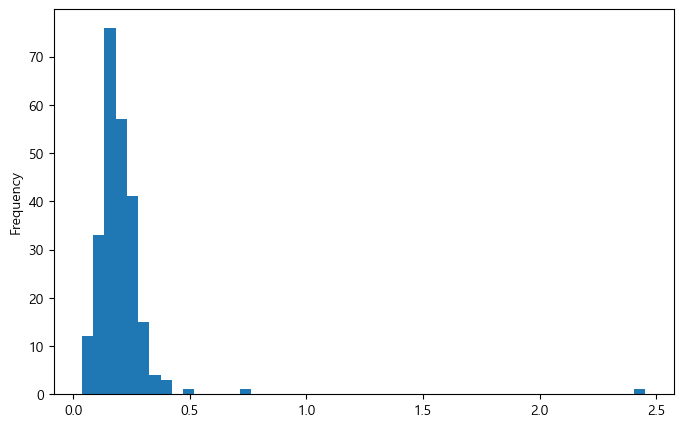

In [197]:
plt.figure(figsize=(8,5))
tips['tip_pct'].plot.hist(bins=50)

<AxesSubplot:xlabel='tip_pct', ylabel='Count'>

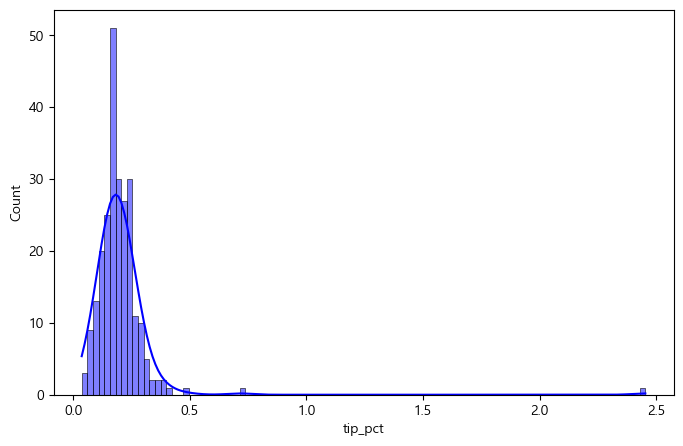

In [198]:
# 히스토그램 
# kde = True : 밀도함수 표시
plt.figure(figsize=(8,5))
sns.histplot(tips['tip_pct'],bins=100,color='b',kde=True)
# sns.histplot(tips['tip_pct'],bins=100,color='b')

<AxesSubplot:xlabel='tip_pct', ylabel='Density'>

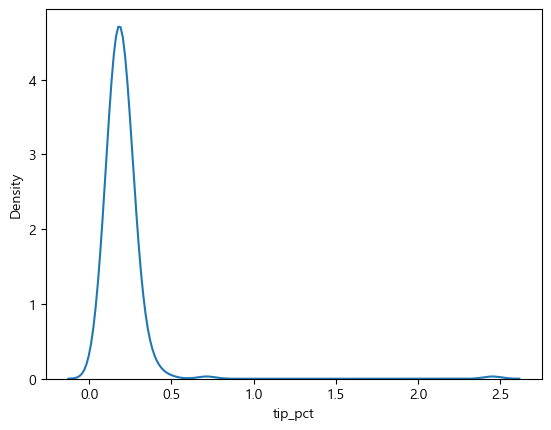

In [199]:
# kdeplot : 확률 밀도 함수를 추정하기 위한 방법중 하나로 커널밀도 추정 그래프를 그리는 함수
sns.kdeplot(data=tips,x='tip_pct')

In [214]:
# seaborn 버전 업그레이드
# !pip install seaborn --upgrade
# 현재 버전 확인
sns.__version__

'0.12.2'

In [201]:
# 물고기 종류별 몸길이 데이터
import pandas as pd
fish_multi = pd.read_csv('../dataset/4_fm2.csv')
fish_multi.head()

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4


<AxesSubplot:xlabel='length', ylabel='Count'>

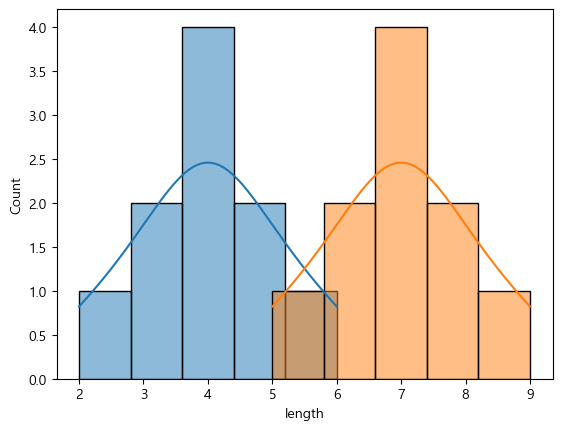

In [202]:
length_a = fish_multi[fish_multi.species=='A']['length']
length_b = fish_multi[fish_multi.species=='B']['length']
sns.histplot(length_a,kde=True)
sns.histplot(length_b,kde=True)
# sns.displot(length_a,kde=True)

<AxesSubplot:xlabel='species', ylabel='length'>

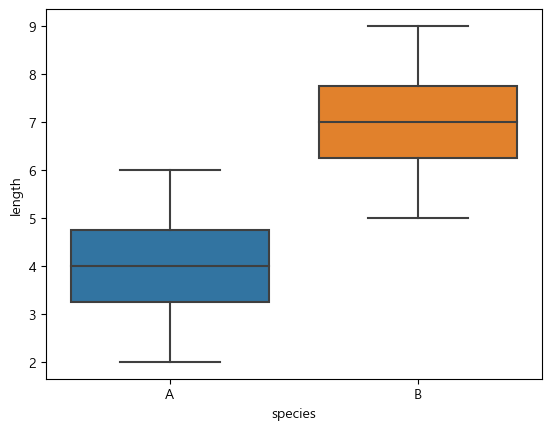

In [203]:
# 박스 플롯
sns.boxplot(x='species',y='length',data=fish_multi)

<AxesSubplot:xlabel='species', ylabel='length'>

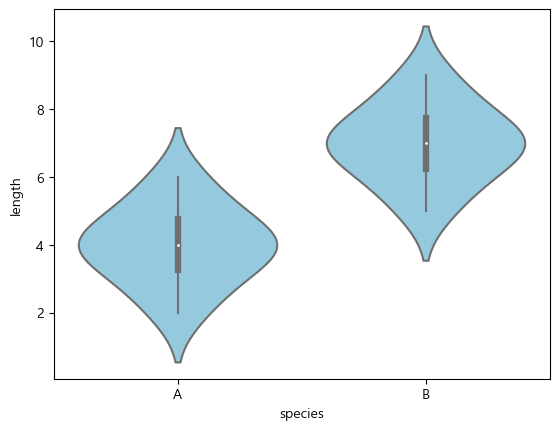

In [204]:
# 바이올린 플롯 : 상자 대신 히스토그램을 세로로 세워서 배치, 
# 어느 부분에 데이터가 집중되어 있는지 정보를 추가
sns.violinplot(x='species',y='length',data=fish_multi, color='skyblue')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

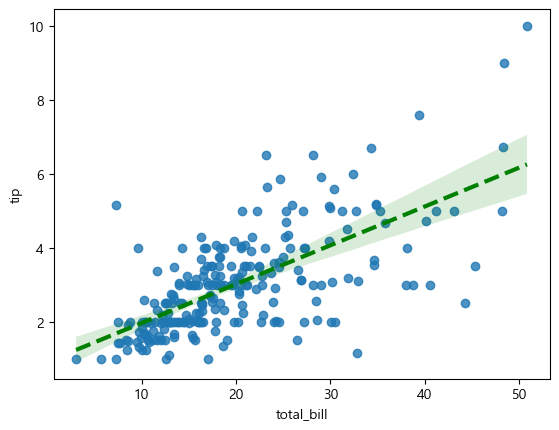

In [205]:
# regplot
# sns.regplot(data=tips,x='total_bill',y='tip')
# sns.lmplot(data=tips, x='total_bill',y='tip')
# sns.regplot(data=tips,x='total_bill',y='tip',scatter_kws={'s':50,'color':'red','alpha':0.5})
sns.regplot(data=tips,x='total_bill',y='tip',\
            line_kws={'color':'green', 'linewidth':3,'linestyle':'--'})

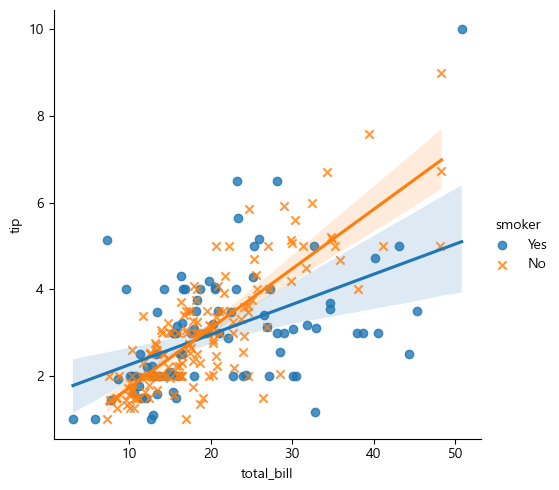

In [206]:
# lmplot : hue 파라미터를 이용 데이터의 그룹을 구분, 미세한 설정을 조절할 수 있다.
sns.lmplot(data=tips, x='total_bill',y='tip', hue='smoker',markers=['o','x'])
# sns.lmplot(data=tips, x='total_bill',y='tip')
# sns.lmplot(data=tips, x='total_bill',y='tip',fit_reg=False)

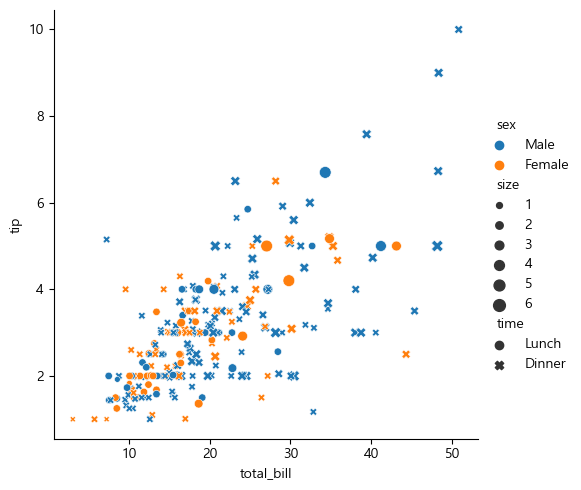

In [207]:
# relplot: 두 변수 간의 관계를 시각화하는 그래프
sns.relplot(data=tips,x='total_bill',y='tip',hue='sex', style='time',size='size')

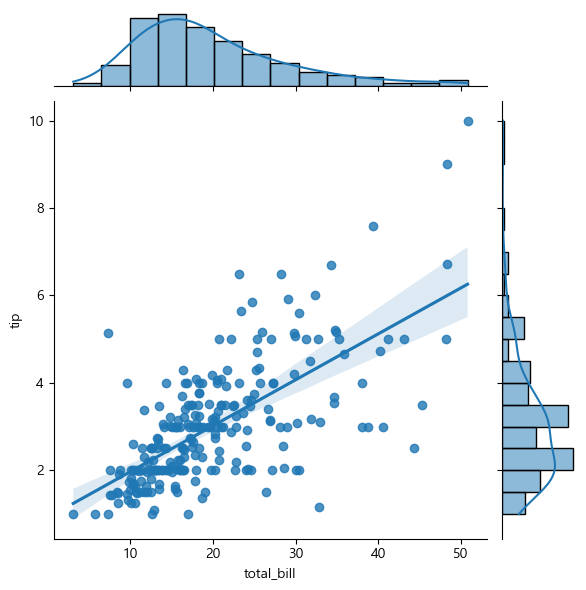

In [208]:
# jointplot 

sns.jointplot(data=tips, x='total_bill',y='tip',kind='reg')

<AxesSubplot:>

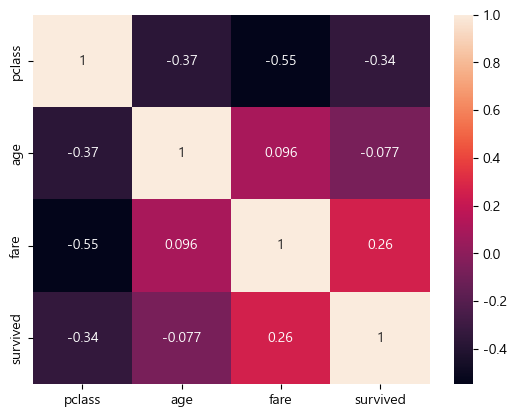

In [209]:
tdf = sns.load_dataset('titanic')
sns.heatmap(tdf[['pclass','age','fare','survived']].corr(),annot=True)

In [210]:
table = tdf.pivot_table(index=['sex'],columns=['class'],values=['survived'],aggfunc='mean')
table

survived                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

<AxesSubplot:xlabel='None-class', ylabel='sex'>

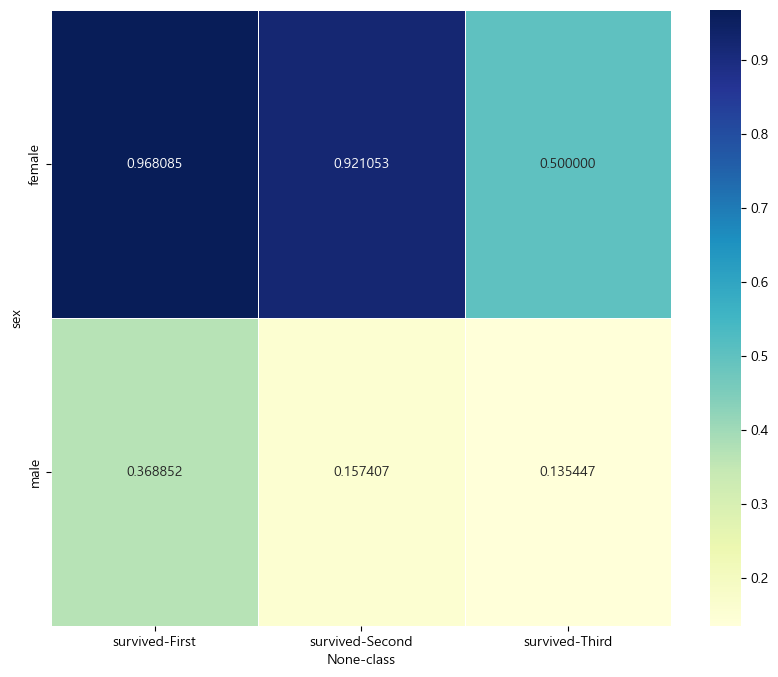

In [211]:
plt.figure(figsize=(10,8))
sns.heatmap(table, annot=True, fmt='f', cmap='YlGnBu', linewidth=.5, cbar=True)

#### pairplot : 다변량 그래프로 데이터프레임에서 두변수간의 관계를 그래프로 나타냄.
<주요 파라미터 옵션>
- data: 그래프를 그릴 데이터프레임
- hue: 데이터를 구분할 컬럼명
- vars: 그래프를 그릴 컬럼명
- - diag_kind: 대각선에 그려질 그래프의 종류 (hist, kde, ecdf)
- kind: 그래프 종류 (scatter, reg, resid, kde, hex)
- palette: 색상 팔레트
- - corner: 그래프의 위치 (lower, upper, both)
- height: 그래프의 높이
- aspect: 그래프의 가로 세로 비율
- dropna: 결측값을 제거할지 여부

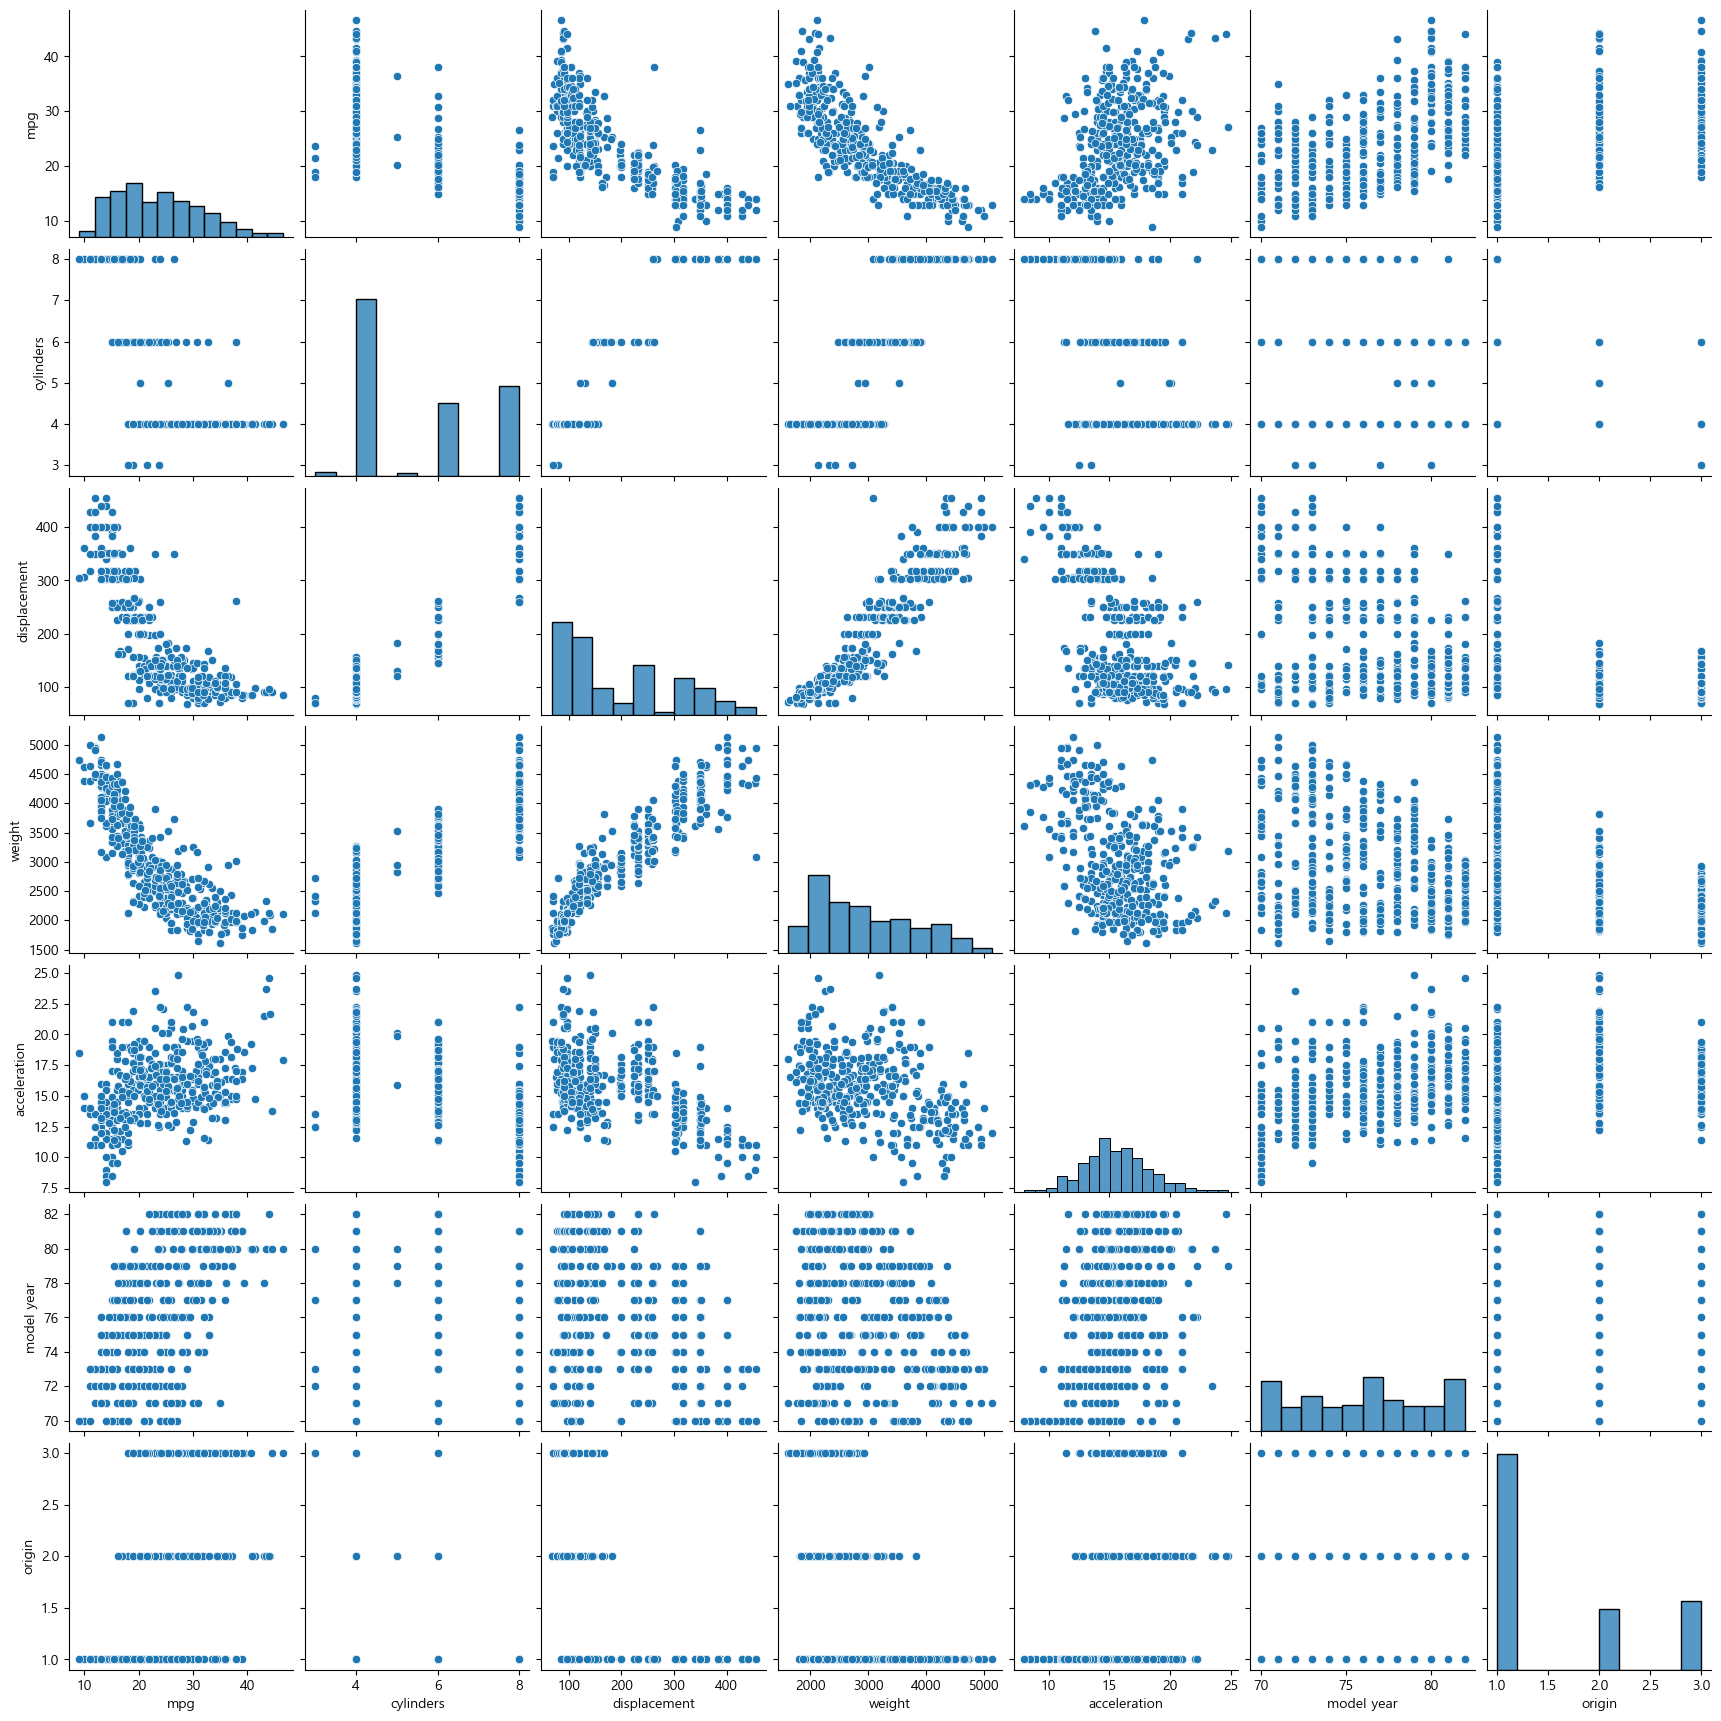

In [212]:
df_auto = pd.read_excel('../dataset/auto-mpg.xlsx')
df_auto.head()
sns.pairplot(df_auto,palette='gray')

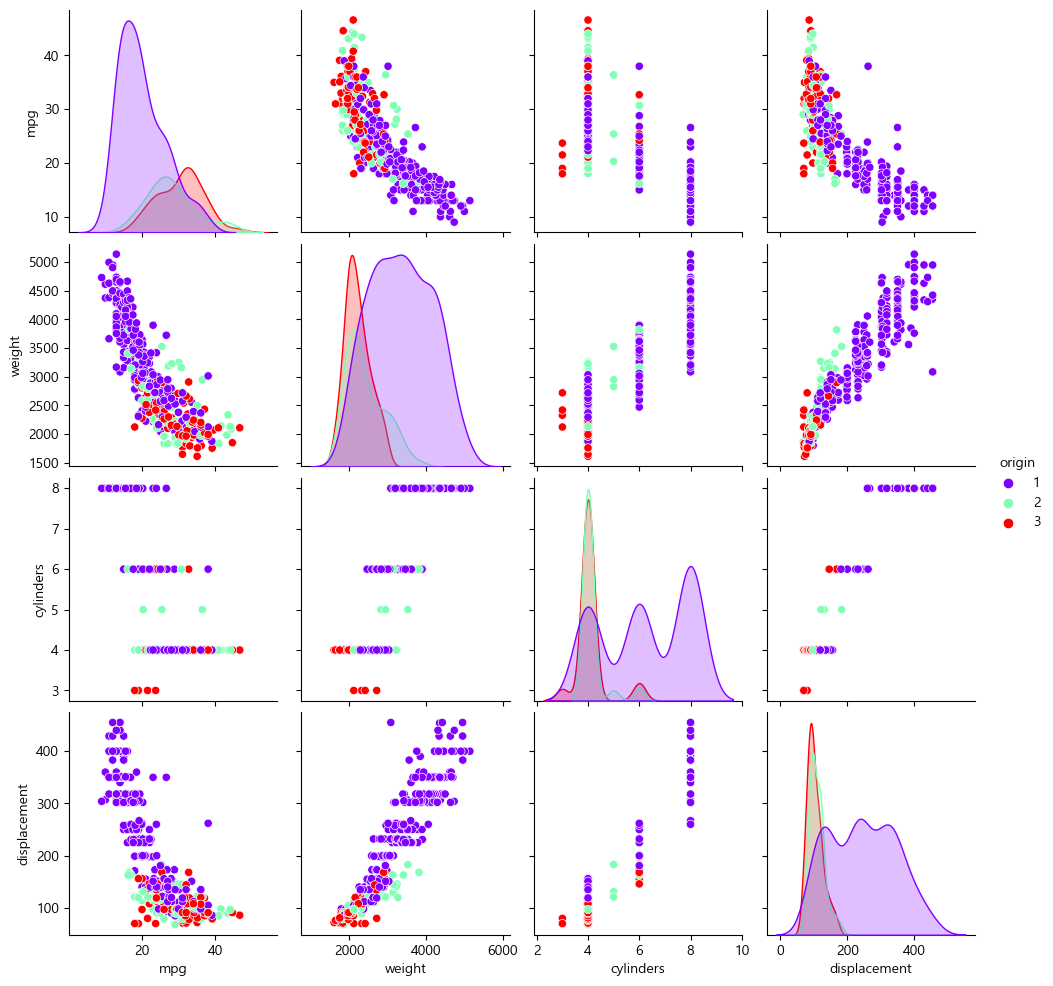

In [213]:
dfa = df_auto[['mpg','weight','cylinders','displacement','origin']]
sns.pairplot(dfa,hue='origin',palette='rainbow')

### 과제

In [80]:
#과제: fifa 데이터셋의 wage컬럼(급료)을 전처리해서 시각화하고 데이터의 의미를 설명
ff = pd.read_csv('../dataset/FIFA.csv', encoding='euc-kr')
a=ff.Wage.value_counts()
type(a)

pandas.core.series.Series

In [81]:
ff.Wage.describe()

count    16642.000000
mean         9.618375
std         22.264145
min          1.000000
25%          1.000000
50%          3.000000
75%          8.000000
max        565.000000
Name: Wage, dtype: float64

In [82]:
ff.Wage.value_counts()

1      4770
2      2704
3      1734
4      1137
5       763
       ... 
250       1
190       1
93        1
405       1
565       1
Name: Wage, Length: 141, dtype: int64

<AxesSubplot:>

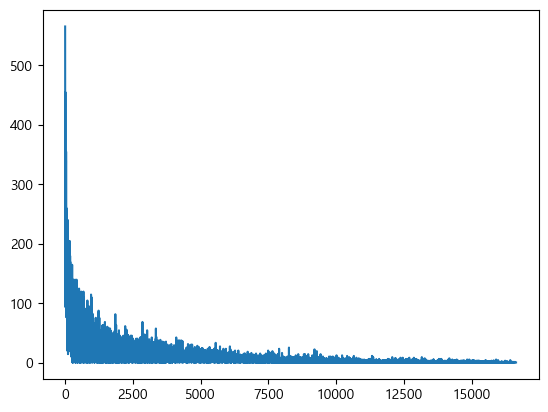

In [83]:
ff.Wage.plot()

In [62]:
def get_wage(w):
    cat=''
    if w<2: cat='하'
    elif w<6: cat='중하'  
    elif w<40: cat='중'
    elif w<150: cat='중상'
    elif w<400: cat='상'
    else: cat='최상'
    return cat

ff['wage_cat'] =ff['Wage'].apply(lambda x: get_wage(x))
ff.head()

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage,wage_cat
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,Medium/ Medium,RF,10,2021,5'7,159,226500,110500,565,최상
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,High/ Low,ST,7,2022,6'2,183,127100,77000,405,최상
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,High/ Medium,LW,10,2022,5'9,150,228100,118500,290,상
3,193080,De Gea,27,Spain,91,Manchester United,Right,Medium/ Medium,GK,1,2020,6'4,168,138600,72000,260,상
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,Right,High/ High,RCM,7,2023,5'11,154,196400,102000,355,상


In [63]:
ff.wage_cat.value_counts()

중하    6338
하     4770
중     4721
중상     732
상       77
최상       4
Name: wage_cat, dtype: int64

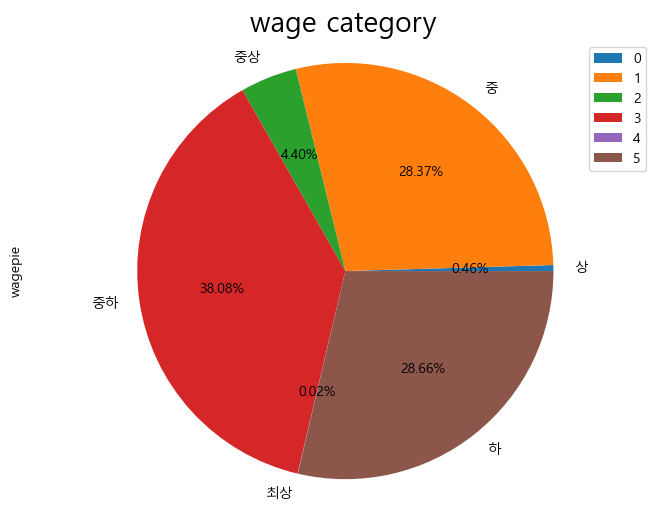

In [64]:
ff['wagepie']=1
ffp = ff.groupby('wage_cat').sum()
ffp

ffp.wagepie.plot(kind='pie', figsize=(8,6), autopct='%.2f%%', startangle=0)

plt.title('wage category', size=20)
plt.axis('equal')
plt.legend(labels=ff.wage_cat.index, loc='best')

In [65]:
data=pd.DataFrame(ff.Wage)
data=data.astype('str')
data[:]='€ '+data[:]+'K'

data.value_counts()

Wage  
€ 1K      4770
€ 2K      2704
€ 3K      1734
€ 4K      1137
€ 5K       763
          ... 
€ 225K       1
€ 200K       1
€ 565K       1
€ 190K       1
€ 380K       1
Length: 141, dtype: int64

AxesSubplot(0.125,0.11;0.775x0.77)
          date  close  start   high    low  volume
10  2018-06-18  12000   1400  13400  12000  309787
11  2018-06-15  13400     50  13600  12900  201376
12  2018-06-14  13450    250  13700  13150  347451
13  2018-06-12  13200   1250  13300  12050  558148


,date,close,start,high,low,volume
0,2018-07-02,10100,600,10900,10000,137977
1,2018-06-29,10700,300,10900,9990,170253
2,2018-06-28,10400,500,10950,10150,155769
3,2018-06-27,10900,100,11050,10500,133548
4,2018-06-26,10800,350,11000,10700,63039
5,2018-06-25,11150,150,11450,11000,55519
6,2018-06-22,11300,100,11450,10750,134805
7,2018-06-21,11200,350,11750,11200,133002
8,2018-06-20,11550,250,11600,10900,308596
9,2018-06-19,11300,700,11950,11300,180656


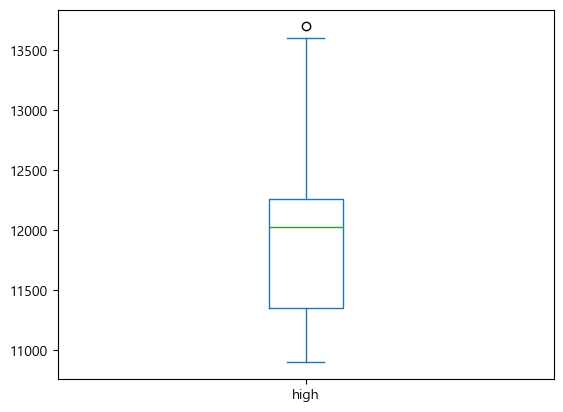

In [66]:
# 과제: high, low 이상치 탐색 후 해당값 제거
df=pd.read_pickle('../dataset/sprice.pkl')
print(df.high.plot(kind='box'))

q1 = df.high.describe()['25%']  
q3 = df.high.describe()['75%']
iq = (q3-q1)*1.5 

abv = (df['high'] <= q1-iqr) | (df['high'] >= q3+iqr)   #이상치
print(df[abv])
df = df.drop(df.index[abv])
df

AxesSubplot(0.125,0.11;0.775x0.77)
          date  close  start   high    low  volume
11  2018-06-15  13400     50  13600  12900  201376
12  2018-06-14  13450    250  13700  13150  347451


,date,close,start,high,low,volume
0,2018-07-02,10100,600,10900,10000,137977
1,2018-06-29,10700,300,10900,9990,170253
2,2018-06-28,10400,500,10950,10150,155769
3,2018-06-27,10900,100,11050,10500,133548
4,2018-06-26,10800,350,11000,10700,63039
5,2018-06-25,11150,150,11450,11000,55519
6,2018-06-22,11300,100,11450,10750,134805
7,2018-06-21,11200,350,11750,11200,133002
8,2018-06-20,11550,250,11600,10900,308596
9,2018-06-19,11300,700,11950,11300,180656


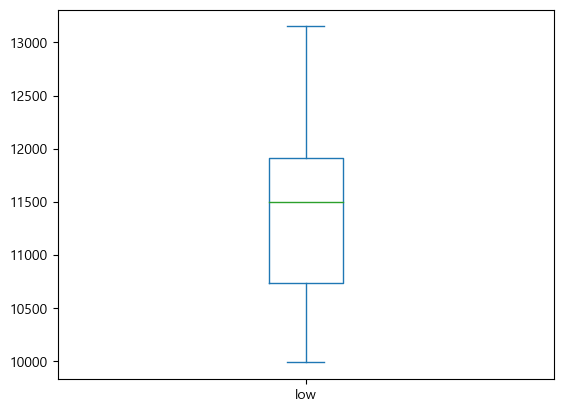

In [67]:
# 과제: high, low 이상치 탐색 후 해당값 제거
df=pd.read_pickle('../dataset/sprice.pkl')
print(df.low.plot(kind='box'))

q1 = df.low.describe()['25%']  
q3 = df.low.describe()['75%']
iq = (q3-q1)*1.5 

abv = (df['low'] <= q1-iqr) | (df['low'] >= q3+iqr)
print(df[abv])
df = df.drop(df.index[abv])
df

In [68]:
# 과제: 각 칼럼을 시각화해서 탐색한 후 인사이트를 기술(5개 이상)
dfat = pd.read_excel('../dataset/auto-mpg.xlsx')
dfat.head()

# 연비/ 실린더/ 배기량/ 마력/ 무게/ 가속능력/ 모델연도

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [69]:
dfat.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


In [70]:
dfat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [71]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
df_scaler=scaler.fit_transform(dfat[['mpg','displacement','weight']])
df_sca=pd.DataFrame(df_scaler, columns=['mpg','displacement','weight']) 
df_sca['model year'] = dfat['model year']
df_sca['origin'] = dfat['origin']

df_sca.describe()

,mpg,displacement,weight,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000
mean,0.386026,0.324098,0.384867,76.010050,1.572864
std,0.207872,0.269431,0.240103,3.697627,0.802055
min,0.000000,0.000000,0.000000,70.000000,1.000000
25%,0.226064,0.093669,0.173164,73.000000,1.000000
50%,0.372340,0.208010,0.337539,76.000000,1.000000
75%,0.531915,0.501292,0.565637,79.000000,2.000000
max,1.000000,1.000000,1.000000,82.000000,3.000000


AxesSubplot(0.125,0.11;0.775x0.77)


,mpg,displacement,weight
origin,,,
1,0.294775,0.459694,0.495870
2,0.502432,0.106312,0.229742
3,0.570496,0.089687,0.172449


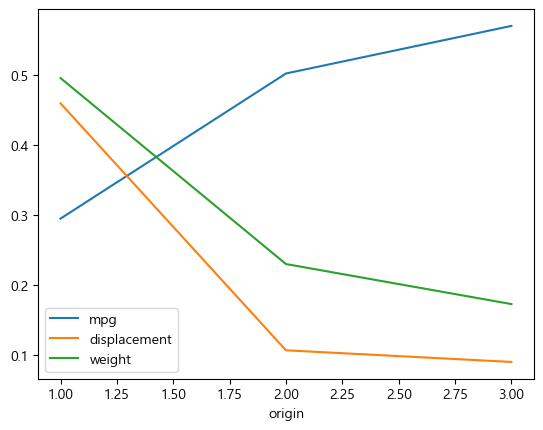

In [72]:
a = df_sca.groupby(['origin'])
ap = a.agg({'mpg':'mean', 'displacement':'mean','weight':'mean'})

print(ap.plot())
ap
# 1번 지역에서 생산된 차는 다른 지역에 비해 연비가 낮고, 배기량이 많고, 무거움

AxesSubplot(0.125,0.11;0.775x0.77)


,mpg,displacement,weight
model year,,,
70,0.231108,0.551457,0.498949
71,0.325798,0.366279,0.391956
72,0.258359,0.388566,0.460650
73,0.215426,0.488049,0.512057
74,0.364460,0.268064,0.358641
75,0.299645,0.355383,0.443380
76,0.334402,0.335385,0.415576
77,0.382314,0.318845,0.392503
78,0.400561,0.283735,0.354070


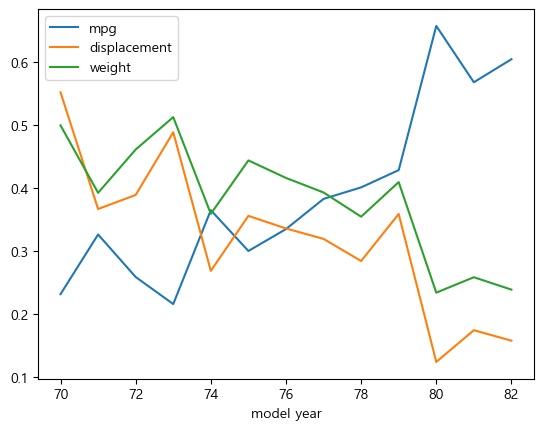

In [73]:
a = df_sca.groupby(['model year'])
ap = a.agg({'mpg':'mean', 'displacement':'mean','weight':'mean'})

print(ap.plot())
ap
# 최신 모델일수록 배기량은 떨어지고, 무게는 가벼워지고, 연비는 높아지는 추세
# 73-74년도 석유파동 -> 73연비 급락, 74배기량 급락

AxesSubplot(0.125,0.11;0.775x0.77)
      mpg  cylinders  displacement horsepower  weight  acceleration  \
322  46.6          4          86.0         65    2110          17.9   

     model year  origin   car name  
322          80       3  mazda glc  


,mpg
329,44.6
325,44.3
394,44.0
326,43.4
244,43.1


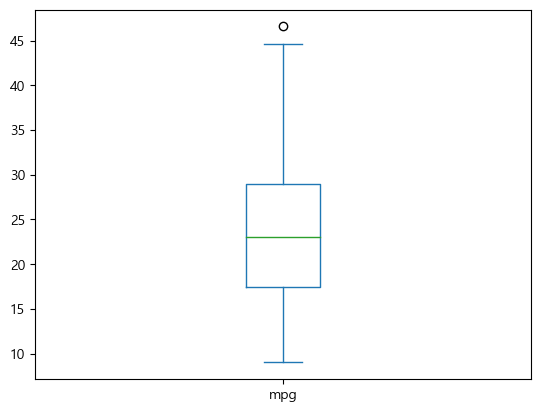

In [74]:
# 과제: mpg컬럼의 이상치 여부를 판단하고 의심되는 값이 있으면 제거
a= dfat['mpg']

a.describe()
print(a.plot(kind='box'))

q1 = a.describe()['25%']  
q3 = a.describe()['75%']
iq = (q3-q1)*1.5 

abv = (a <= q1-iq) | (a >= q3+iq)
print(dfat[abv])

dfat = dfat.drop(dfat.index[abv])
dfat.sort_values('mpg', ascending=False)[['mpg']].head()

In [75]:
dfat.mpg.describe()

count    397.000000
mean      23.456423
std        7.739166
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       44.600000
Name: mpg, dtype: float64

In [76]:
df = pd.read_csv('../dataset/주가데이터.csv')
df.drop('시가',axis=1,inplace=True)   #'시가'열 삭제
df.columns=['date','close','start','high','low','volume']   #칼럼명 변경

df.head()

,date,close,start,high,low,volume
0,2018-07-02,10100,600,10900,10000,137977
1,2018-06-29,10700,300,10900,9990,170253
2,2018-06-28,10400,500,10950,10150,155769
3,2018-06-27,10900,100,11050,10500,133548
4,2018-06-26,10800,350,11000,10700,63039


In [77]:
def low_whisker(dataframe,col):    #이상치 뽑는 사용자함수 정의
    Q1 = col.describe()['25%']
    Q3 = col.describe()['75%']
    IQR = Q3 - Q1
    abv  = dataframe[(col <= (Q1-IQR*1.5))  |  (col >= (Q3+IQR*1.5))]
    return abv


print(low_whisker(df, df.start))

          date  close  start   high    low  volume
10  2018-06-18  12000   1400  13400  12000  309787
13  2018-06-12  13200   1250  13300  12050  558148
